<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/3_Aprendizaje_Supervisado_Clasificacion_Tumoresferas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
#### **Práctico de Aprendizaje_Supervisado**



Importamos las librerías necesarias:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib
import matplotlib.pyplot as plt
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import kurtosis
import scipy.stats
import math

# Ejemplo de una de las imágenes umbralizadas:
from IPython.display import Image

import numpy as np
from sklearn.linear_model import LinearRegression

En este práctico, utilizaremos el archivo original *fiji_datos_0al7mo_labels.csv* que se encuentra en la carpeta *data/raw/*.

Además sumaremos los siguientes datos sintéticos que se encuentran en la carpeta *data/datos_sinteticos/*:
  * datos_sinteticos_dias_3_y_5.csv
  * synthetic_3y5_sint2.csv
  * synthetic_data_dia_3_si.csv
  * synthetic_data_dia_4_si.csv
  * synthetic_data_dia_5_si.csv

Como también dos archivos extras que están en la capeta *data/03_AS/*:
  * fiji_datos_mean_diam.csv
  * fiji_datos_noise.csv
  

In [ ]:
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos_original = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/datos_sinteticos_dias_3_y_5.csv'
datos_sinteticos_dias_3_y_5 = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_3y5_sint2.csv'
synthetic_3y5_sint2 = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_3_si.csv'
synthetic_data_dia_3_si = pd.read_csv(url4)

url5 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_4_si.csv'
synthetic_data_dia_4_si = pd.read_csv(url5)

url6 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/datos_sinteticos/synthetic_data_dia_5_si.csv'
synthetic_data_dia_5_si = pd.read_csv(url6)

url7 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/03_AS/fiji_datos_mean_diam.csv'
fiji_datos_mean_diam = pd.read_csv(url7)

url8 = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/03_AS/fiji_datos_noise.csv'
fiji_datos_noise = pd.read_csv(url8)


url9 ='https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/G1/df_clean_TP1.csv'
df_clean_TP1 = pd.read_csv(url9)

# Regresión


1.   Utilizando del día 1 al 5 los datos clasificados como 'Esferoide' = 'si', realizar un ajuste del diámetro medio. Sean los datos reales *mean_diam_df* y la señal ruidosa *df_noise*.


In [ ]:
mean_diam_df = fiji_datos_mean_diam.copy()
mean_diam_df

,dia,mean
0,0,23.145003
1,1,31.781506
2,2,60.685558
3,3,101.092311
4,4,89.688273
5,5,110.212304


In [ ]:
df_noise = fiji_datos_noise.copy()
#df_noise

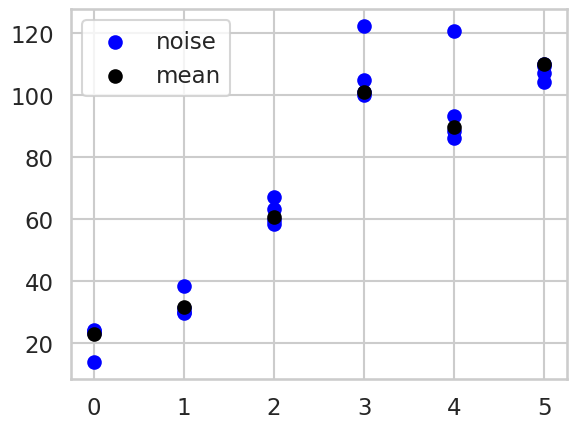

In [ ]:
X_noise = df_noise['dia']
y_noise = df_noise['mean']
X_noise = np.array(X_noise.to_list())
y_noise = np.array(y_noise.to_list())

X_mean = mean_diam_df['dia']
y_mean = mean_diam_df['mean']
X_mean = np.array(X_mean.to_list())
y_mean = np.array(y_mean.to_list())

plt.scatter(X_noise, y_noise, color="blue", label="noise")
plt.scatter(X_mean, y_mean, color="black", label="mean")
plt.legend()
plt.show()

Probar un ajuste lineal, polinomial, probar el ajuste "óptimo" que da el menor error cuadrático y sobreajuste.  

**Regresión Lineal**

Determinamos el modelo de regresion lineal para ambos conjuntos de datos y los entrenamos

In [ ]:
model_noise = LinearRegression()
model_mean = LinearRegression()


In [ ]:
model_noise.fit(X_noise.reshape(-1, 1), y_noise)
model_mean.fit(X_mean.reshape(-1, 1), y_mean)

LinearRegression()

In [ ]:
y_noise_pred = model_noise.predict(X_noise.reshape(-1, 1))
y_mean_pred = model_mean.predict(X_mean.reshape(-1, 1))

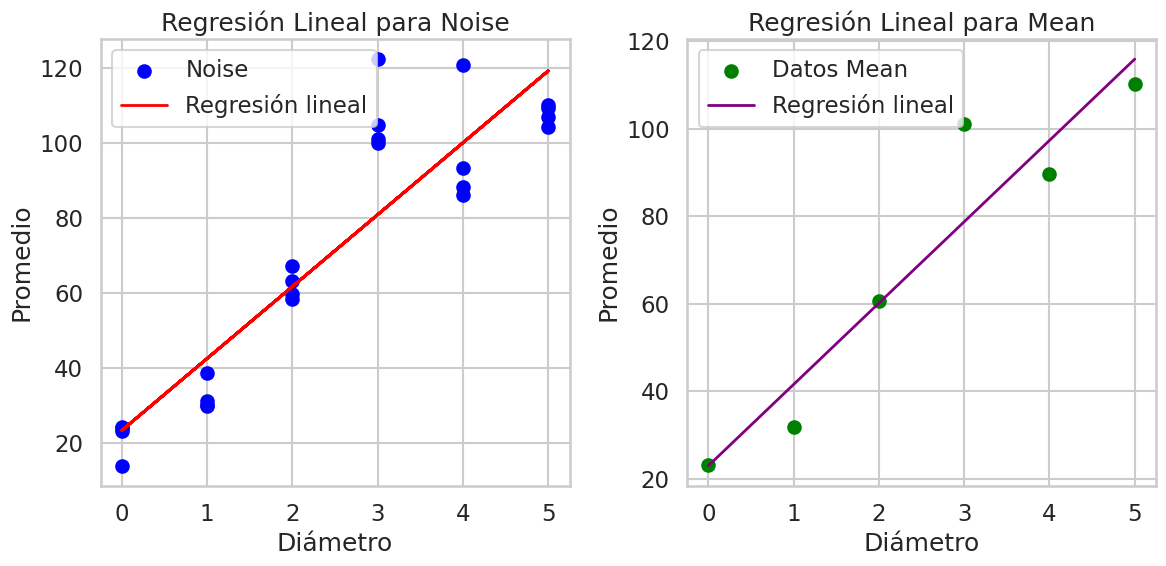

In [ ]:
plt.figure(figsize=(12, 6))

# Gráfico para datos de ruido
plt.subplot(1, 2, 1)
plt.scatter(X_noise, y_noise, color='blue', label='Noise')
plt.plot(X_noise, y_noise_pred, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal para Noise')
plt.xlabel('Diámetro')
plt.ylabel('Promedio')
plt.legend()

# Gráfico para datos promedio
plt.subplot(1, 2, 2)
plt.scatter(X_mean, y_mean, color='green', label='Datos Mean')
plt.plot(X_mean, y_mean_pred, color='purple', linewidth=2, label='Regresión lineal')
plt.title('Regresión Lineal para Mean')
plt.xlabel('Diámetro')
plt.ylabel('Promedio')
plt.legend()

plt.tight_layout()
plt.show()

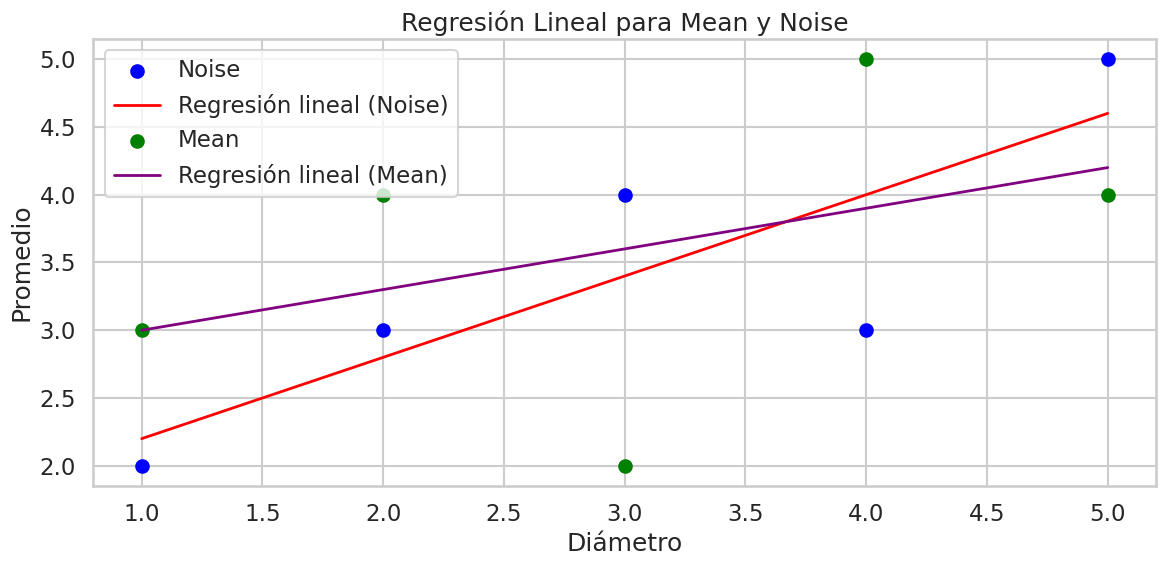

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos
X_noise = np.array([1, 2, 3, 4, 5])
y_noise = np.array([2, 3, 4, 3, 5])
X_mean = np.array([1, 2, 3, 4, 5])
y_mean = np.array([3, 4, 2, 5, 4])

# Modelos de regresión lineal
model_noise = LinearRegression()
model_mean = LinearRegression()
model_noise.fit(X_noise.reshape(-1, 1), y_noise)
model_mean.fit(X_mean.reshape(-1, 1), y_mean)
y_noise_pred = model_noise.predict(X_noise.reshape(-1, 1))
y_mean_pred = model_mean.predict(X_mean.reshape(-1, 1))

# Crear un solo gráfico con dos series de datos
plt.figure(figsize=(12, 6))

# Gráfico para datos Noise
plt.scatter(X_noise, y_noise, color='blue', label='Noise')
plt.plot(X_noise, y_noise_pred, color='red', linewidth=2, label='Regresión lineal (Noise)')

# Gráfico para datos Mean
plt.scatter(X_mean, y_mean, color='green', label='Mean')
plt.plot(X_mean, y_mean_pred, color='purple', linewidth=2, label='Regresión lineal (Mean)')

plt.title('Regresión Lineal para Mean y Noise')
plt.xlabel('Diámetro')
plt.ylabel('Promedio')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calcula el MSE para los datos de Noise
mse_noise = mean_squared_error(y_noise, y_noise_pred)
print(f'MSE para Datos Noise: {mse_noise:.2f}')

# Calcula el MSE para los datos mean
mse_mean = mean_squared_error(y_mean, y_mean_pred)
print(f'MSE para Datos Mean: {mse_mean:.2f}')

MSE para Datos Noise: 0.32
MSE para Datos Mean: 0.86


Conclusion

Un MSE de 0.32 es relativamente bajo, lo que indica que el modelo de regresión lineal se ajusta razonablemente bien a los datos noise. Esto significa que las predicciones del modelo están bastante cerca de los valores reales en promedio para esos datos.

Por otro lado un MSE de 0,86 es más alto que el MSE para los datos noise. Esto sugiere que el modelo de regresión lineal ajusta menos precisamente a los datos promedio en comparación con los datos de noise. Las predicciones del modelo tienen un error cuadrático promedio más grande en los datos mean.

En resumen el modelo de regresión lineal parece ser mejor para ajustarse a los datos noise en comparación con los datos mean.

**Regresion Polinomial**

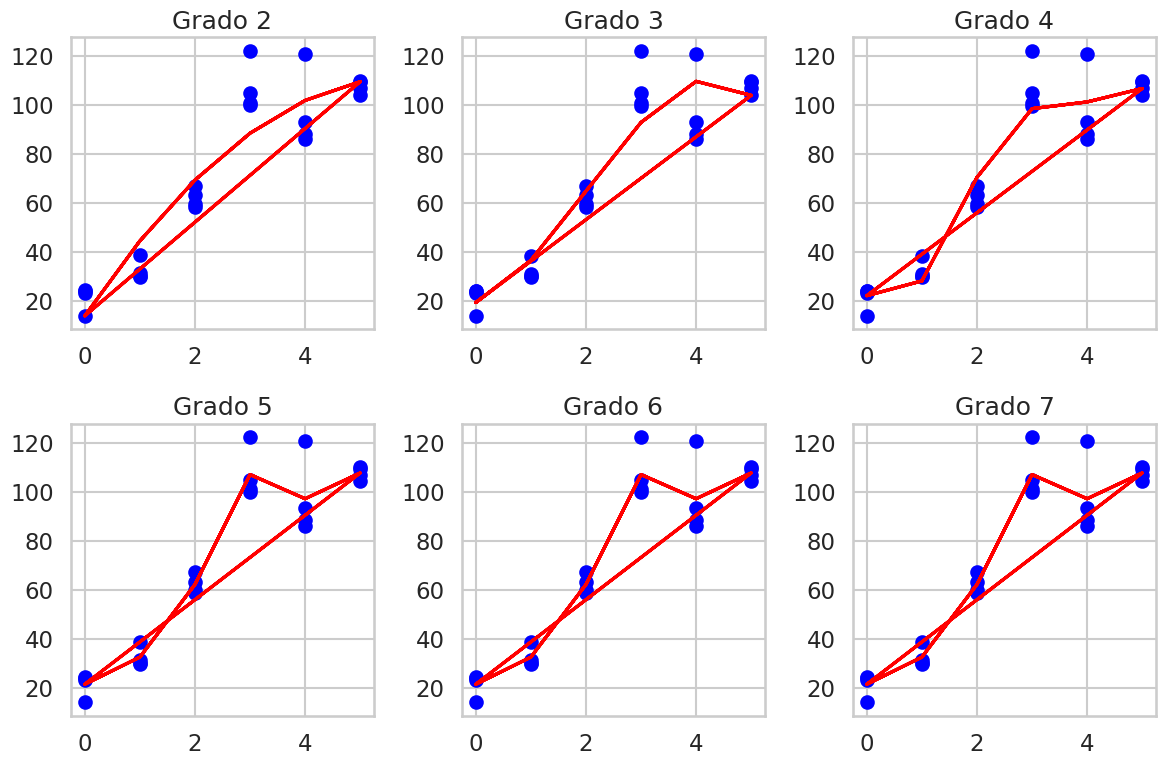

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos noise
X_noise = np.array(df_noise['dia'].to_list())
y_noise = np.array(df_noise['mean'].to_list())

# Datos mean
X_mean = np.array(mean_diam_df['dia'].to_list())
y_mean = np.array(mean_diam_df['mean'].to_list())

# Define una serie de grados polinomiales para probar
degrees = [2, 3, 4, 5, 6, 7]

# Crear una figura para mostrar los resultados
plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees):
    # Transforma los datos de entrada a características polinómicas
    poly_features = PolynomialFeatures(degree=degree)
    X_noise_poly = poly_features.fit_transform(X_noise.reshape(-1, 1))

    # Ajusta un modelo de regresión lineal a los datos polinómicos
    model_noise = LinearRegression()
    model_noise.fit(X_noise_poly, y_noise)

    # Predice los valores usando el modelo
    y_noise_pred = model_noise.predict(X_noise_poly)

    # Crea el subplot correspondiente
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas

    # Dibuja los datos noise y la regresión polinomial
    plt.scatter(X_noise, y_noise, label='Datos Noise', color='blue')
    plt.plot(X_noise, y_noise_pred, label=f'Regresión Polinomial (Grado {degree})', color='red')
    plt.title(f'Grado {degree}')

plt.tight_layout()
plt.show()  # Mostrar la figura


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba
X_noise_train, X_noise_test, y_noise_train, y_noise_test = train_test_split(X_noise, y_noise, test_size=0.2, random_state=42)

# Define una lista de grados de polinomio a evaluar
degrees = [1, 2, 3, 4, 5, 6, 7]

# Crea listas para almacenar los errores cuadráticos medios en los conjuntos de entrenamiento y prueba
mse_train_list = []
mse_test_list = []

for degree in degrees:
    # Transforma los datos de entrada a características polinómicas
    poly_features = PolynomialFeatures(degree=degree)
    X_noise_train_poly = poly_features.fit_transform(X_noise_train.reshape(-1, 1))
    X_noise_test_poly = poly_features.transform(X_noise_test.reshape(-1, 1))

    # Ajusta un modelo de regresión lineal a los datos de entrenamiento polinómicos
    model_noise = LinearRegression()
    model_noise.fit(X_noise_train_poly, y_noise_train)

    # Predice los valores en el conjunto de entrenamiento y prueba
    y_noise_train_pred = model_noise.predict(X_noise_train_poly)
    y_noise_test_pred = model_noise.predict(X_noise_test_poly)

    # Calcula el error cuadrático medio en los conjuntos de entrenamiento y prueba
    mse_train = mean_squared_error(y_noise_train, y_noise_train_pred)
    mse_test = mean_squared_error(y_noise_test, y_noise_test_pred)

    # Almacena los MSE en las listas
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

    # Imprime los MSE para cada grado de polinomio
for degree, mse_train, mse_test in zip(degrees, mse_train_list, mse_test_list):
    print(f'Grado {degree}:')
    print(f'MSE en el conjunto de entrenamiento: {mse_train}')
    print(f'MSE en el conjunto de prueba: {mse_test}')
    print('---')

Grado 1:
MSE en el conjunto de entrenamiento: 239.47624775664
MSE en el conjunto de prueba: 116.08216770681565
---
Grado 2:
MSE en el conjunto de entrenamiento: 164.37346248474697
MSE en el conjunto de prueba: 195.20152510282702
---
Grado 3:
MSE en el conjunto de entrenamiento: 119.96236616866676
MSE en el conjunto de prueba: 145.96671844188728
---
Grado 4:
MSE en el conjunto de entrenamiento: 89.85201029404351
MSE en el conjunto de prueba: 73.03794876358504
---
Grado 5:
MSE en el conjunto de entrenamiento: 60.14892851969087
MSE en el conjunto de prueba: 41.14523421007625
---
Grado 6:
MSE en el conjunto de entrenamiento: 60.148928519690855
MSE en el conjunto de prueba: 41.14523420992934
---
Grado 7:
MSE en el conjunto de entrenamiento: 60.148928519690855
MSE en el conjunto de prueba: 41.14523420981668
---


Conclusion

El mejor modelo de regresion polinomial es el de grado 4 ya que tiene un MSE significativamente menor en el conjunto de entrenamiento y un MSE menor en el conjunto de prueba en comparación con modelos de menor grado. Esto indica que el modelo parece ser una mejor elección en términos de equilibrio entre sesgo y varianza.

En relacion a los modelos de grado 5, 6 y 7 tienen un MSE de entrenamiento similar, lo que sugiere que no hay una mejora sustancial en el ajuste a los datos de entrenamiento a medida que aumenta el grado. El MSE en el conjunto de prueba es menor que en los modelos de menor grado, lo que indica que estos modelos podrían estar ligeramente sobreajustados, pero su rendimiento general en los datos de prueba es mejor.

# Clasificación

Aquí vamos a usar el dataset sin modificar, que se encuentra en 'raw/fiji_datos_0al7mo_labels.csv', en la carpeta del repositorio y de la carpeta compartida.

1.Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.

2.El dataset que tenemos, es linealmente separable?

3.Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del repositorio y de la carpeta compartida:

4.Elegir uno de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

4.1.Tomar todo el dataset.

4.2.Realizar clasificación con solo los datos del día 3, 4 y 5.

4.3.Tomar solo los días 3,4 y 5 y sumar los datos sintéticos.

4.4.Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.


Elegir un escenario, recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla. Separen en conjuntos de entrenamiento y test, hacer tratamiento de ouliers, agregar columnas preprocesadas al original como algunas que sean combinaciones/modificaciones de las demás, multiplicaciones, logaritmos, potencias, por ej, verificando que no sean correlacionadas con las que ya tienen.

Recordar que las transformaciones se realizan sobre el conjunto de train y luego se ajusta el de test. Si hacen todo antes y luego separan, puede haber traspaso de información sobre el conjunto de train al test (data leakage).

Realizar un EDA rápido de como quedaron las variables y si la distribuciones en test son similares a las que tienen en train. En todos los casos, tanto para train y test, visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

Implementar sobre los conjuntos test y train del escenario elegido algún clasificador lineal como también probar DT, Random Forest y XGBoost.

Explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas (sobre todo f1 y precision) determinar cuál es el mejor algoritmo de clasificación. En los algoritmos que lo permitan, hacer listado de importancia de features y probar con diferentes combinaciones de columnas si la métrica hallada mejora si se disminuye la cantidad de columnas (puede ser que esto no ocurra también).

Con el algoritmo que tenga las mejores métricas , probar si mejora o empeoran la clasificación probando algún otro escenario (con todos los pasos que implica).


OPCIONAL:

Probar la métrica: coeficiente de correlación de Matthews (está implementado en sklearn como una métrica más: from sklearn.metrics import matthews_corrcoef )

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los escenarios anteriores.

Super buenas prácticas en este repositorio, es muy instructivo chusmear sobre todo el archivo '06_FinalModel.ipynb' solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.

Como este es el último práctico, si se animan, podrían implementar clústering. Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP.

Realizar EDA sobre los conjuntos que encontraron y traten de explicarlos.

Muchas veces en problemas de negocios, no es tan importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".


## 1) Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.


La adecuación de plantear un problema como supervisado depende de la naturaleza de los datos y del objetivo del análisis o modelado.

En un problema supervisado, se tiene un conjunto de datos que incluye ejemplos de entrada (características) y la correspondiente salida (etiquetas, en este caso Esferoide) que se desea predecir o modelar.

Teniendo en cuenta nuestro objetivo y viendo que nuestras etiquetas corresponden a variables categoricas,  "Esferoide si y no", en funcion de las características especificas, se trata de una **Problema supervisado del tipo Clasificación**

Si nuestra variable a predecir fuesen numéricas hablariamos de regresión



## 2) El dataset que tenemos, es linealmente separable?


Para iniciar este análisis decidimos evaluarlo probando varias perspectivas para ver si en alguna obtenemos alguna separabilidad lineal.

Primero recuperamos el DF utilizado en el primer trabajo practico donde se hizo un análisis exahustivo de Limpieza y curación denominado "df_clean_TP1"

In [ ]:
df_clean_TP1_copy=df_clean_TP1.copy()
print(df_clean_TP1_copy.shape)
df_clean_TP1_copy = df_clean_TP1_copy.drop("nombre_id", axis=1)
df_clean_TP1_copy.head()

(813, 16)


,area,perimetro,ancho,altura,circularidad,feret,FeretAngle,min_feret,razon_aspecto,redondez,Solidity,esferoide,dia,diametro,poblacion_celular
0,324.4440,67.3603,21.0598,19.7011,0.8985,22.2117,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,497.5115,82.8004,25.8152,25.1359,0.9119,26.8751,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,282.9078,62.1586,19.7011,18.3424,0.9201,20.4370,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,500.7421,84.5571,26.4946,25.1359,0.8801,26.6336,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,492.8964,82.0728,25.1359,24.4565,0.9195,26.2232,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596


## Dia 3,4,5 y  PCA

Evaluando estas caracteristicas no son linealmente separables

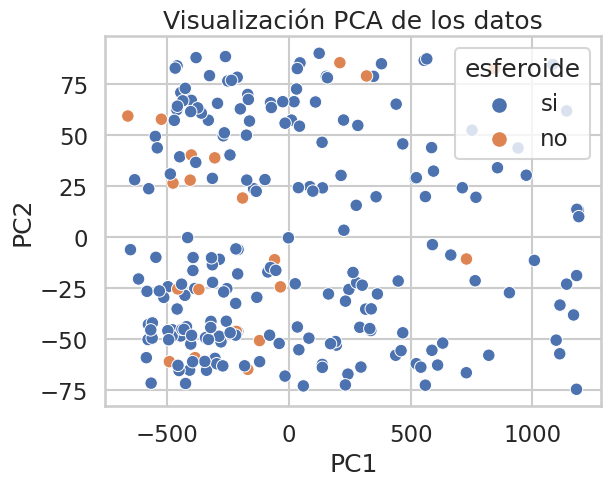

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Selecciona las columnas de características (excluyendo la columna de etiquetas)
df_filtered = df_clean_TP1_copy.loc[df_clean_TP1_copy['dia'].isin([3, 4, 5])]
X = df_filtered.drop('esferoide', axis=1)

# Aplica PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crea un DataFrame con las nuevas dimensiones y la etiqueta
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['esferoide'] = df_clean_TP1_copy['esferoide']

# Visualiza los datos
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='esferoide')
plt.title('Visualización PCA de los datos')
plt.show()

##Todos los días y PCA - 3D

Se intenta graficar 3D y observando todos los días , tampoco hay separabilidad lineal.

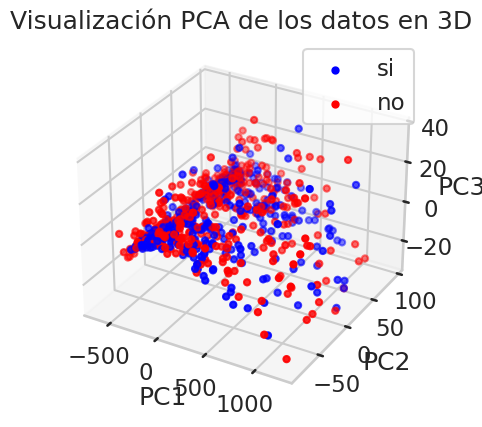

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mpl_toolkits.mplot3d as Axes3D  # Importa para gráficos 3D
import numpy as np

# Supongamos que 'fiji_datos_original_copy' ya está definido en tu entorno

# Selecciona las columnas de características (excluyendo la columna de etiquetas)
X = df_clean_TP1_copy.drop('esferoide', axis=1)

# Aplica PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Crea un DataFrame con las nuevas dimensiones y la etiqueta
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['esferoide'] = df_clean_TP1_copy['esferoide']

# Asigna colores a las categorías 'si' y 'no'
color_mapping = {'si': 'blue', 'no': 'red'}
df_pca['Color'] = df_pca['esferoide'].map(color_mapping)

# Visualiza los datos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Color'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualización PCA de los datos en 3D')

# Agrega una leyenda personalizada
for label, color in color_mapping.items():
    ax.scatter([], [], [], c=color, label=label)

ax.legend()

plt.show()


##Modelo Lineal :Regresión y visualización

No se obtienen buenos resultados , tras el intento de varios modelos obteniendo feontera de decisión .
No son linealmente separables.

In [ ]:
df_clean_TP1_copy.columns

Index(['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret',
       'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity',
       'esferoide', 'dia', 'diametro', 'poblacion_celular'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = df_clean_TP1_copy[['area', 'perimetro', 'ancho', 'altura', 'circularidad', 'feret',
       'FeretAngle', 'min_feret', 'razon_aspecto', 'redondez', 'Solidity', 'dia', 'diametro', 'poblacion_celular']]
y = df_clean_TP1_copy['esferoide']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reducir las características a circularidad y area para visualizar en 2D
X_train_2d = X_train[['circularidad', 'area']]
X_test_2d = X_test[['circularidad', 'area']]

# Entrenar un modelo de regresión logística en 2D
model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)

# Crear una malla de puntos en el espacio de características
x_min, x_max = X_train_2d['circularidad'].min() - 1, X_train_2d['circularidad'].max() + 1
y_min, y_max = X_train_2d['area'].min() - 1, X_train_2d['area'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predecir la clase de cada punto en la malla de puntos
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el gráfico de dispersión de puntos de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d['circularidad'], X_train_2d['area'], c="red", cmap=plt.cm.Paired, label='Training Data', marker='o')
plt.scatter(X_test_2d['circularidad'], X_test_2d['area'], c="blue", cmap=plt.cm.Paired, label='Testing Data', marker='x')

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Etiquetas y leyenda
plt.xlabel('circularidad')
plt.ylabel('area')
plt.legend()
plt.title('Frontera de Decisión de Regresión Logística (2D)')
plt.show()


## 3) Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del repositorio y de la carpeta compartida

### Explorando características en común/diferencias

In [ ]:
data_sint3y5 = datos_sinteticos_dias_3_y_5.copy()
data_sint2_3y5 = synthetic_3y5_sint2.copy()
data_sint_3si = synthetic_data_dia_3_si.copy()
data_sint_4si = synthetic_data_dia_4_si.copy()
data_sint_5si = synthetic_data_dia_5_si.copy()

print('Dataset data_sint3y5: ', data_sint3y5.shape)
print('Dataset data_sint2_3y5:', data_sint2_3y5.shape)
print('Dataset data_sint_3si', data_sint_3si.shape)
print('Dataset data_sint_4si', data_sint_4si.shape)
print('Dataset data_sint_5si', data_sint_5si.shape)

Dataset data_sint3y5:  (55, 13)
Dataset data_sint2_3y5: (161, 13)
Dataset data_sint_3si (56, 13)
Dataset data_sint_4si (50, 13)
Dataset data_sint_5si (41, 13)


In [ ]:
# Rellena el DataFrame df_comparison con valores booleanos True o False.
# Si una columna está presente en un DataFrame determinado, se establece el valor en True;
# de lo contrario, se establece en False.

# Lista 'dataframes' que contiene los 9 DataFrames
dataframes = [data_sint3y5, data_sint2_3y5, data_sint_3si, data_sint_4si, data_sint_5si]

# Obtener la lista de todas las columnas en todos los DataFrames
all_columns = []

for df in dataframes:
    all_columns.extend(df.columns.tolist())

# Eliminar duplicados de la lista de columnas
all_columns = list(set(all_columns))

# Crear el DataFrame con filas = nombres de las columnas y columnas = nombres de los DataFrames
df_comparison = pd.DataFrame(index=all_columns, columns=[f"data{i}" for i in range(len(dataframes))])

# Llenar el DataFrame con valores True o False
for i, df in enumerate(dataframes):
    for column in df.columns:
        df_comparison.loc[column, f"data{i}"] = True

# Rellenar los valores faltantes con False
df_comparison.fillna(False, inplace=True)

# Aplicar formato condicional para resaltar en rojo los valores False
df_formatted = df_comparison.style.applymap(lambda x: 'color: red' if not x else '')
df_formatted

,data0,data1,data2,data3,data4
dia,True,True,True,True,True
AR,True,True,True,True,True
Esferoide,True,True,True,True,True
MinFeret,True,True,True,True,True
Feret,True,True,True,True,True
Circ.,True,True,True,True,True
Round,True,True,True,True,True
Solidity,True,True,True,True,True
Diameter,True,True,True,True,True
n_diam,True,True,True,True,True


- Se obsevan diferencian en los shapes de los dataset, todos tienen 13 columnas pero difieren en la cantidad de filas.

In [ ]:
"""
Por las dudas chequear valores nulos
"""
dfs = [data_sint3y5, data_sint2_3y5, data_sint_3si, data_sint_4si, data_sint_5si]

for df in dfs:
    missing_values_sum = df.isnull().sum()
    print(missing_values_sum)
    print()

labels       0
Area         0
Perim.       0
Circ.        0
Feret        0
MinFeret     0
AR           0
Round        0
Solidity     0
Esferoide    0
dia          0
Diameter     0
n_diam       0
dtype: int64

labels       0
Area         0
Perim.       0
Circ.        0
Feret        0
MinFeret     0
AR           0
Round        0
Solidity     0
Esferoide    0
dia          0
Diameter     0
n_diam       0
dtype: int64

labels       0
Area         0
Perim.       0
Circ.        0
Feret        0
MinFeret     0
AR           0
Round        0
Solidity     0
Esferoide    0
dia          0
Diameter     0
n_diam       0
dtype: int64

labels       0
Area         0
Perim.       0
Circ.        0
Feret        0
MinFeret     0
AR           0
Round        0
Solidity     0
Esferoide    0
dia          0
Diameter     0
n_diam       0
dtype: int64

labels       0
Area         0
Perim.       0
Circ.        0
Feret        0
MinFeret     0
AR           0
Round        0
Solidity     0
Esferoide    0
dia          0

In [ ]:
"""
Buscar valores duplicados en cada df por columna
"""
import pandas as pd

cols = data_sint3y5.columns

def find_and_print_duplicate_counts(df, df_name, cols):
    for column in cols:
        duplicate_count = df[column].duplicated().sum()
        if duplicate_count > 0:
            print(f"Column '{column}' in {df_name}: {duplicate_count} duplicate(s)")

# Create a dictionary of DataFrames and their names
data_frames = {
    'data_sint3y5': data_sint3y5,
    'data_sint2_3y5': data_sint2_3y5,
    'data_sint_3si': data_sint_3si,
    'data_sint_4si': data_sint_4si,
    'data_sint_5si': data_sint_5si
}

for df_name, df in data_frames.items():
    print()
    find_and_print_duplicate_counts(df, df_name, cols)


Column 'Solidity' in data_sint3y5: 2 duplicate(s)
Column 'Esferoide' in data_sint3y5: 54 duplicate(s)
Column 'dia' in data_sint3y5: 53 duplicate(s)

Column 'Area' in data_sint2_3y5: 38 duplicate(s)
Column 'Perim.' in data_sint2_3y5: 23 duplicate(s)
Column 'Circ.' in data_sint2_3y5: 17 duplicate(s)
Column 'Feret' in data_sint2_3y5: 22 duplicate(s)
Column 'MinFeret' in data_sint2_3y5: 21 duplicate(s)
Column 'AR' in data_sint2_3y5: 37 duplicate(s)
Column 'Round' in data_sint2_3y5: 21 duplicate(s)
Column 'Solidity' in data_sint2_3y5: 17 duplicate(s)
Column 'Esferoide' in data_sint2_3y5: 159 duplicate(s)
Column 'dia' in data_sint2_3y5: 159 duplicate(s)
Column 'Diameter' in data_sint2_3y5: 21 duplicate(s)
Column 'n_diam' in data_sint2_3y5: 49 duplicate(s)

Column 'Solidity' in data_sint_3si: 3 duplicate(s)
Column 'Esferoide' in data_sint_3si: 55 duplicate(s)
Column 'dia' in data_sint_3si: 55 duplicate(s)

Column 'AR' in data_sint_4si: 3 duplicate(s)
Column 'Round' in data_sint_4si: 2 duplic

- Los duplicados de `esferoide`, tienen sentido porque toma valores "si", al igual que la variable `dia`, ya que según el día vale 3, 4 o 5.

- Hay 2-3 datos duplicado en `Solidity`, `AR`,`Circ.`, lo cual pudo haber sido por coincidencia **pero** en el data frame **data_sint_5si** `Circ.` no puede tener tantos valores duplicados, eso no puede ser posible.

- Explorar más a fondo **data_sint2_3y5**


      Me queda la duda por qué en data_sint3y5 esferoide y dia no tienen la mima len cuando ya vimos que no hay datos nulos


In [ ]:
###Ver los primeros duplicados por 'Area'
data_sint2_3y5[data_sint2_3y5['Area'].duplicated() == True].sort_values('Area').head(10)

,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
1,000ix,122.7626,101.527170,0.900619,32.269328,30.219156,1.277680,0.843124,0.974896,no,5,31.236372,0.381040
80,000sh,122.7626,41.118800,0.701045,14.185200,12.152500,1.524134,0.732858,0.899970,no,5,13.297800,0.381040
89,000tf,122.7626,41.118800,0.919472,14.185200,12.152500,1.001200,0.957903,0.969878,no,3,13.297800,0.381040
96,000tv,122.7626,47.730825,0.944000,18.385648,19.076918,1.186737,0.884152,0.982119,no,5,18.720950,19.625004
97,000ty,122.7626,73.930101,0.926091,28.244864,24.975960,1.157780,0.876555,0.979254,no,3,26.605730,0.381040
99,000ua,122.7626,41.118800,0.928467,14.185200,12.152500,1.001200,0.998800,0.959304,no,5,13.297800,0.381040
101,000ud,122.7626,41.118800,0.944000,14.185200,12.152500,1.319750,0.754154,0.960590,no,5,13.297800,0.381040
102,000ue,122.7626,41.118800,0.850605,14.185200,12.152500,1.324542,0.761306,0.939066,no,3,13.297800,0.381040
105,000uo,122.7626,67.974640,0.792598,24.425624,15.348253,1.236871,0.833438,0.928120,no,3,19.888557,0.381040
106,000uq,122.7626,41.118800,0.789149,14.185200,12.152500,1.265763,0.820669,0.905877,no,3,13.297800,0.381040


- Aquí en esta pequeña exploración vemos muchos valores duplicados de **Area** y **n_diam**, además, estos corresponden a **esferoides = no**, lo cual no puede ser porque se generaron datos sintéticos de esferoide = si, por lo tanto, la idea es filtrar por esferoides = si y ver con qué datos nos quedamos.

In [ ]:
data_sint2_3y5_si = data_sint2_3y5[data_sint2_3y5['Esferoide'] == 'si']
print('Dataset data_sint2_3y5_si: ', data_sint2_3y5_si.shape)
data_sint2_3y5_si.head()

Dataset data_sint2_3y5_si:  (37, 13)


,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
4,000ju,6796.984868,284.745161,0.788278,85.622933,72.657070,1.001200,0.955847,0.931386,si,3,79.115739,205.487181
5,000jv,122.762600,123.722134,0.703623,42.069491,22.044864,1.477242,0.719726,0.921846,si,3,32.065710,0.381040
8,000kf,8834.139565,372.980584,0.774937,117.583256,100.445817,1.001200,0.936844,0.966514,si,3,109.041957,229.689689
10,000kn,6124.622648,241.394293,0.912862,73.193194,76.138932,1.001200,0.998800,0.985100,si,5,74.654009,130.258532
16,000ld,5939.086101,308.157077,0.856715,98.157484,84.072304,1.053568,0.955263,0.985100,si,5,91.128768,135.435138


In [ ]:
###Revisamos de nuevo
cols = ['labels', 'Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam']
for column in cols:
    duplicate_count = data_sint2_3y5_si[column].duplicated().sum()
    if duplicate_count > 0:
        print(f"Column '{column}' in data_sint2_3y5_si: {duplicate_count} duplicate(s)")

Column 'Area' in data_sint2_3y5_si: 1 duplicate(s)
Column 'Circ.' in data_sint2_3y5_si: 1 duplicate(s)
Column 'AR' in data_sint2_3y5_si: 16 duplicate(s)
Column 'Round' in data_sint2_3y5_si: 5 duplicate(s)
Column 'Solidity' in data_sint2_3y5_si: 6 duplicate(s)
Column 'Esferoide' in data_sint2_3y5_si: 36 duplicate(s)
Column 'dia' in data_sint2_3y5_si: 35 duplicate(s)
Column 'n_diam' in data_sint2_3y5_si: 4 duplicate(s)


In [ ]:
###Ver cuántos datos hay por dia
column_name = 'dia'
unique_values = data_sint2_3y5_si[column_name].unique()
value_counts = data_sint2_3y5_si[column_name].value_counts()

print(f"Unique values in {column_name}:\n{unique_values}\n")
print(f"Count of each unique value in {column_name}:\n{value_counts}")

Unique values in dia:
[3 5]

Count of each unique value in dia:
5    20
3    17
Name: dia, dtype: int64


In [ ]:
###¿es normal que AR tenga 16 coincidencia "duplicados"?
data_sint2_3y5_si[data_sint2_3y5_si['AR'].duplicated() == True].sort_values('dia').head(20)

,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
8,000kf,8834.139565,372.980584,0.774937,117.583256,100.445817,1.0012,0.936844,0.966514,si,3,109.041957,229.689689
47,000oz,8048.327944,358.531887,0.804035,110.984951,96.725076,1.0012,0.958558,0.984875,si,3,103.862543,204.561944
95,000tr,8739.281950,277.633954,0.944000,92.020326,83.082880,1.0012,0.978785,0.985100,si,3,87.538433,259.383177
149,000zp,7478.015108,237.489702,0.935042,73.385553,72.805564,1.0012,0.993736,0.984689,si,3,73.108832,220.861998
152,000zv,6111.341401,282.624469,0.911662,86.374515,81.213287,1.0012,0.938043,0.985100,si,3,83.780788,124.227679
10,000kn,6124.622648,241.394293,0.912862,73.193194,76.138932,1.0012,0.998800,0.985100,si,5,74.654009,130.258532
17,000lh,8951.864808,310.922538,0.836388,95.313244,87.102736,1.0012,0.960519,0.973229,si,5,91.204215,294.337223
69,000rf,12494.359480,436.458043,0.801118,131.963330,119.486303,1.0012,0.998800,0.977290,si,5,125.715450,394.074679
70,000rh,10272.096660,349.373005,0.900235,102.335163,98.432944,1.0012,0.998800,0.978867,si,5,100.396027,326.511799
75,000rt,6968.095281,347.670951,0.736737,103.461145,89.505323,1.0012,0.954009,0.959583,si,5,96.478482,157.658215


¿Cuál es la diferencia entre esos duplicados y qué criterio aplicar para que elimicar los duplicados cuál dato debo conservar?

Por exploración visual no vemos un patron o indisio que diferencia un dato duplicado del otro, al parecer se generaron dados random pero esos 16 valores de AR quedaron constantes, por lo tanto, al dropearlos nos quedaremos con la primera coincidencia en AR.

In [ ]:
data_sint2_3y5_si_clean = data_sint2_3y5_si.drop_duplicates(subset=['AR'], keep='first')
print(data_sint2_3y5_si_clean.shape)

(21, 13)


In [ ]:
###Ver cuántos datos hay por dia
column_name = 'dia'
unique_values = data_sint2_3y5_si_clean[column_name].unique()
value_counts = data_sint2_3y5_si_clean[column_name].value_counts()

print(f"Unique values in {column_name}:\n{unique_values}\n")
print(f"Count of each unique value in {column_name}:\n{value_counts}")

Unique values in dia:
[3 5]

Count of each unique value in dia:
3    12
5     9
Name: dia, dtype: int64


Bien después de limpiarlo nos quedamos en éstos datos que después veremos si conviene o no unirlos con los otros datos sintéticos.

In [ ]:
###Veamos el otro dataset que tiene datos duplicados
###Ver los primeros duplicados por 'Circ.' de data_sint_5si
data_sint_5si[data_sint_5si['Circ.'].duplicated() == True].sort_values('Circ.').head(10)

,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
1,000gl,17291.426981,524.0741,-0.627087,163.107805,155.1193,1.053760,0.949237,0.9835,si,5,149.262276,635.094169
23,000o0,1031.418499,126.7667,-0.627087,42.016020,39.5319,1.096758,0.911934,0.9757,si,5,37.725926,8.294970
24,000oi,3256.781989,223.3107,-0.627087,65.106056,56.4437,1.046759,0.955200,0.9827,si,5,54.686279,31.999310
25,000op,21447.014184,605.7851,-0.627087,194.122612,160.3573,1.114719,0.897275,0.9578,si,5,171.129872,874.366149
26,000pr,4781.318136,321.9662,-0.627087,75.721084,87.1084,1.115518,0.896702,0.9495,si,5,72.520614,92.577386
27,000qd,7708.462579,338.7435,-0.627087,92.590504,107.9652,1.065110,0.939036,0.9825,si,5,89.478634,157.066089
28,000qg,4292.231461,246.8401,-0.627087,63.021564,77.6758,1.023507,0.976916,0.9741,si,5,67.179792,61.366617
29,000qp,8103.354863,384.4776,-0.627087,121.644842,109.3367,1.021296,0.979020,0.9708,si,5,97.787602,187.699750
22,000nz,12444.935868,467.1595,-0.627087,123.925211,120.8529,1.103284,0.906991,0.9340,si,5,123.419132,414.657484
30,000rk,11115.966934,422.7866,-0.627087,111.282066,138.8032,1.075347,0.929922,0.9808,si,5,113.686533,331.413255


Evidentemente hay un problema con los valores de esa columna, además que todos son valores negativos.

In [ ]:
import pandas as pd

def find_and_print_negative_values(df, cols, df_name):
    negative_values = {}

    for col in cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            negative_values[col] = df[df[col] < 0][col]

    for col, values in negative_values.items():
        if not values.empty:
            print(f"Negative values in column '{col}' of DataFrame '{df_name}':")
            print(values)
            print()

# Create a dictionary of DataFrames and their names
data_frames = {
    'data_sint3y5': data_sint3y5,
    'data_sint2_3y5': data_sint2_3y5,
    'data_sint_3si': data_sint_3si,
    'data_sint_4si': data_sint_4si,
    'data_sint_5si': data_sint_5si
}

for df_name, df in data_frames.items():
    find_and_print_negative_values(df.head(), cols, df_name)

Negative values in column 'Circ.' of DataFrame 'data_sint_5si':
0   -0.627087
1   -0.627087
2   -0.627087
3   -0.627087
4   -0.627087
Name: Circ., dtype: float64



- Con esto vemos que tenemos datos con valores negativos por lo tanto todo el dataset **data_sint_5si** se debe descartar.


------

Después de esta primera exploración de los datos sintéticos nos quedamos con

- data_sint3y5
- data_sint2_3y5_clean
- data_sint_3si
- data_sint_4si

Lo siguiente puede ser filtar por dia, comparar los datos, ver si son diferentes, que tanto se parecen o no, si no hay ningún dato raro pos podemos concatenar en un solo df y por último sumar los datos del día 4 que no hay con quien compararlo. Después de juntar los datos sintéticos en una solo df, compararlos con los datos experimentales.

### Comparando datos dia = 3

Con base en lo anterior vamos a filtrar **data_sint3y5** por el día ==3 y compararlos con el **data_sint_3si**.

Por empezar con el filtro que aplicamos a continuación vemos que tiene menos rows que data_sint_3si

In [ ]:
df_3 = data_sint3y5[data_sint3y5['dia'] == 3]
df_3_clean = data_sint2_3y5_si_clean[data_sint2_3y5_si_clean['dia'] == 3]

print('Dataset data_sint3y5: ', df_3.shape)
print('Dataset df_3_clean: ', df_3_clean.shape)
print('Dataset data_sint_3si: ',data_sint_3si.shape)

Dataset data_sint3y5:  (29, 13)
Dataset df_3_clean:  (12, 13)
Dataset data_sint_3si:  (56, 13)


In [ ]:
df_3_clean = data_sint3y5[data_sint3y5['dia'] == 3]

In [ ]:
df_3.describe().round(4)

,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,dia,Diameter,n_diam
count,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0,29.0000,29.0000
mean,7879.9556,279.2699,0.8365,99.2712,85.0655,1.1076,0.9089,0.9702,3.0,91.2979,188.0850
std,5375.4052,111.3212,0.0389,42.3983,33.6590,0.0958,0.0713,0.0130,0.0,38.2398,218.5249
min,1623.6546,150.1424,0.7414,51.0715,39.8900,1.0075,0.7979,0.9302,3.0,44.7800,10.0399
25%,3293.4331,184.9685,0.8122,60.7351,55.6766,1.0266,0.8360,0.9659,3.0,57.8797,19.4266
50%,6490.3664,247.0383,0.8413,81.8915,76.2902,1.0609,0.9372,0.9735,3.0,76.8019,76.5861
75%,10081.6666,351.5335,0.8724,129.0413,106.0875,1.2030,0.9705,0.9803,3.0,116.3809,294.8097
max,18755.9899,506.4760,0.8882,186.1937,159.2266,1.2665,0.9922,0.9847,3.0,171.5763,737.8678


In [ ]:
df_3_clean.describe().round(4)

,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,dia,Diameter,n_diam
count,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0000,29.0,29.0000,29.0000
mean,7879.9556,279.2699,0.8365,99.2712,85.0655,1.1076,0.9089,0.9702,3.0,91.2979,188.0850
std,5375.4052,111.3212,0.0389,42.3983,33.6590,0.0958,0.0713,0.0130,0.0,38.2398,218.5249
min,1623.6546,150.1424,0.7414,51.0715,39.8900,1.0075,0.7979,0.9302,3.0,44.7800,10.0399
25%,3293.4331,184.9685,0.8122,60.7351,55.6766,1.0266,0.8360,0.9659,3.0,57.8797,19.4266
50%,6490.3664,247.0383,0.8413,81.8915,76.2902,1.0609,0.9372,0.9735,3.0,76.8019,76.5861
75%,10081.6666,351.5335,0.8724,129.0413,106.0875,1.2030,0.9705,0.9803,3.0,116.3809,294.8097
max,18755.9899,506.4760,0.8882,186.1937,159.2266,1.2665,0.9922,0.9847,3.0,171.5763,737.8678


In [ ]:
data_sint_3si.describe().round(4)

,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,dia,Diameter,n_diam
count,56.0000,56.0000,56.0000,56.0000,56.0000,56.0000,56.0000,56.0000,56.0,56.0000,56.0000
mean,9573.6586,364.8955,0.8329,113.2374,100.1981,1.1373,0.8848,0.9705,3.0,104.0123,316.2465
std,7174.5990,148.8012,0.0574,44.6898,39.0640,0.0945,0.0691,0.0106,0.0,40.6100,315.1640
min,1003.1170,121.8531,0.7083,41.5540,35.1638,1.0205,0.7273,0.9479,3.0,37.7792,8.2519
25%,2696.8859,229.5560,0.7880,74.2043,64.4510,1.0684,0.8418,0.9646,3.0,66.4343,18.6707
50%,6467.7836,333.9220,0.8482,117.0412,94.7910,1.1105,0.9014,0.9712,3.0,97.2375,126.2865
75%,15364.4518,496.3647,0.8801,151.3116,134.9374,1.1882,0.9355,0.9796,3.0,137.7631,604.3442
max,22299.0963,626.7273,0.9140,199.6791,166.6959,1.3746,0.9799,0.9855,3.0,176.4275,861.3431


Aca en el describe para los conjuntos de datos del dia = 3, se pueden realizar las siguientes observaciones:
- el len de data_sint_3si es casi el doble que [data_sint3y5['dia'] == 3 (df_3)
- Hay algunos valores max i min que estan baste alejados  de las mean, pero eso lo podemos ver después en la exploración visual por diagramas de caja, gráficas de densidad.


                Area	      Perim.	  Circ.	Feret	  MinFeret	AR	    Round	Solidity	dia	Diameter	n_diam
    mean_df3	7879.9556	279.2699	0.8365	99.2712	85.0655	 1.1076	0.9089	0.9702	 3.0	91.2979	188.0850

    mean_clean  7713.4130	330.8503	0.7546	105.7880	85.5809	1.2854	0.8049	0.9453	3.0	95.6784	219.6494

    mean_3si	9573.6586	364.8955	0.8329	113.2374	100.1981	1.1373	0.8848	0.9705	3.0	104.0123	316.2465

Comparando las medias de cada conjunto de datos, vemos que las diferencias ente éstas no es tan grande apesar que un dataset tiene el doble de datos. Por el momento creemos que tenemos información suficiente para juntar estos dos conjuntos por dia = 3.

¿Tendrán algunos labels en común?

Descartamos que son data_sint_3si estuviera incluído en data_sint3y5['dia'] == 3

In [ ]:
##No hay labels en común a primera vistas
###sintéticos diferentes
col1 = 'labels'
col2 = 'labels'

common_values = set(df_3[col1]).intersection(data_sint_3si[col2])

print(f"Common values between '{col1}' in df_3 and '{col2}' in data_sint_3si:")
print(common_values)

Common values between 'labels' in df_3 and 'labels' in data_sint_3si:
set()


### Comparando datos dia = 5

In [ ]:
df_5 = data_sint3y5[data_sint3y5['dia'] == 5]
df_5_clean = data_sint2_3y5_si_clean[data_sint2_3y5_si_clean['dia'] == 5]

print('Dataset data_sint3y5: ', df_5.shape)
print('Dataset df_3_clean: ', df_5_clean.shape)

Dataset data_sint3y5:  (26, 13)
Dataset df_3_clean:  (9, 13)


In [ ]:
df_5.describe().round(4)

,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,dia,Diameter,n_diam
count,26.0000,26.0000,26.0000,26.0000,26.0000,26.0000,26.0000,26.0000,26.0,26.0000,26.0000
mean,9774.8765,328.2012,0.8200,115.2573,100.4130,1.1279,0.8919,0.9636,5.0,108.3108,268.6448
std,6158.0984,127.3102,0.0514,40.8419,32.6411,0.1002,0.0689,0.0163,0.0,36.1510,268.6629
min,2490.4289,171.9946,0.7038,47.7609,47.0721,1.0256,0.7295,0.9183,5.0,46.7445,10.8486
25%,5155.6167,233.4918,0.7953,92.0162,78.3358,1.0605,0.8775,0.9525,5.0,80.4455,85.7818
50%,7805.2874,283.4116,0.8427,108.8516,91.5072,1.0982,0.9067,0.9683,5.0,100.6283,187.1323
75%,14198.6332,415.0484,0.8522,136.9415,125.6660,1.1427,0.9402,0.9753,5.0,134.2313,281.9251
max,21069.3540,570.4674,0.8803,193.0088,158.3622,1.3690,0.9699,0.9850,5.0,173.0542,870.3555


In [ ]:
df_5_clean.describe().round(4)

,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,dia,Diameter,n_diam
count,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0000,9.0,9.0000,9.0000
mean,6654.2003,294.0056,0.8126,93.2221,77.6041,1.2066,0.8719,0.9578,5.0,85.4100,188.3788
std,4599.9744,126.6209,0.0666,39.2388,32.3279,0.1451,0.0532,0.0220,0.0,35.6599,151.7750
min,122.7626,104.0474,0.7103,33.7997,29.5507,1.0032,0.7959,0.9197,5.0,31.6739,0.3810
25%,4268.8157,212.6365,0.7560,65.6834,56.8689,1.0814,0.8320,0.9447,5.0,62.5686,100.9857
50%,5939.0861,308.1571,0.8004,98.1575,81.9026,1.1835,0.8832,0.9600,5.0,91.1288,135.4351
75%,10591.6105,403.1931,0.8780,129.3659,104.1982,1.3223,0.9145,0.9774,5.0,117.0566,328.3532
max,13999.9204,479.4056,0.8932,146.5779,130.8730,1.4332,0.9553,0.9851,5.0,138.7093,422.3098


In [ ]:
##################
##Calcular la diferencia absoluta de cada columna para cada dataframe
##################
columns = ['Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round',
           'Solidity', 'Diameter', 'n_diam']

# Initialize a dictionary to store the mean differences
abs_mean_differences = {}

# Calculate the absolute mean difference for each column
for column in columns:
    # Convert column values to numeric, handling non-numeric values
    df_5_clean_values = pd.to_numeric(df_5_clean[column], errors='coerce')
    df_5_values = pd.to_numeric(df_5[column], errors='coerce')

    # Calculate the mean difference
    mean_difference = df_5_clean_values.mean() - df_5_values.mean()
    abs_mean_difference = abs(mean_difference)
    abs_mean_differences[column] = abs_mean_difference

# Convert the dictionary to a DataFrame
abs_mean_differences_df = pd.DataFrame(abs_mean_differences, index=['Absolute Mean Difference'])

# Transpose the DataFrame for better display
abs_mean_differences_df = abs_mean_differences_df.T

# Print the absolute mean differences between the corresponding columns
print(abs_mean_differences_df)

          Absolute Mean Difference
Area                   3120.676185
Perim.                   34.195575
Circ.                     0.007409
Feret                    22.035133
MinFeret                 22.808880
AR                        0.078743
Round                     0.020020
Solidity                  0.005814
Diameter                 22.900854
n_diam                   80.265958


- De nuevo acá para el dia = 5  se ve que las diferencia no el doble de la media de alguna de las variables, asi que también podríamos unir estos dos subconjuntos de datos.

### Concatenar datos sintéticos

Procedemos a concatener tal como se muestra en el esquema, donde es colocar un df debajo del otro, ya que todos conservan las mismas columnas/nombres.

- Dataset data_sint3y5:  (29, 13)
- Dataset df_3_clean:  (12, 13)
- Dataset data_sint_3si:  (56, 13)
- Dataset data_sint_4si (50, 13)

Al final debemos obtener 182 rows y 13 columns

In [ ]:
total_length = len(data_sint3y5) + len(data_sint2_3y5_si_clean) + len(data_sint_3si) + len(data_sint_4si)
print("Sum of lengths of all DataFrames:", total_length)

Sum of lengths of all DataFrames: 182


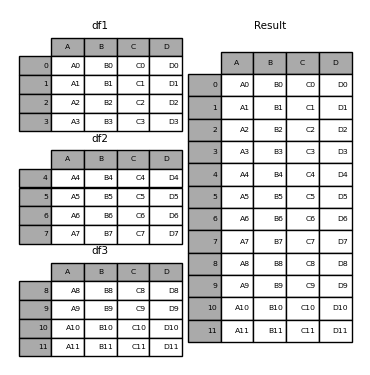

In [ ]:
frames = [data_sint3y5, data_sint2_3y5_si_clean, data_sint_3si, data_sint_4si]
df_si_3_4_5 = pd.concat(frames)
print(df_si_3_4_5.shape)
df_si_3_4_5.head()

(182, 13)


,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,0001u,2108.856029,158.5521,0.853148,52.0548,39.8900,1.252439,0.801927,0.9574,si,3,44.779969,11.118208
1,0001v,5494.716556,267.7438,0.765975,108.6886,78.1359,1.367897,0.729508,0.9424,si,5,94.045240,55.354949
2,0001w,4604.334693,208.6327,0.835749,79.2150,78.5711,1.007505,0.992155,0.9544,si,3,74.802030,24.886113
3,0001x,3293.433060,184.9685,0.888199,59.5354,55.6766,1.039236,0.955215,0.9792,si,3,57.879742,19.426588
4,000a0,12597.351184,393.5486,0.741410,115.4147,98.4842,1.126705,0.888984,0.9568,si,3,108.587775,412.669660


In [ ]:
"""
Buscar valores duplicados en cada df por columna
"""
import pandas as pd

def find_and_print_duplicate_counts(df, df_name, cols):
    for column in cols:
        duplicate_count = df[column].duplicated().sum()
        if duplicate_count > 0:
            print(f"Column '{column}' in {df_name}: {duplicate_count} duplicate(s)")

# Create a dictionary of DataFrames and their names
data_frames = {
    'df_si_3_4_5': df_si_3_4_5
}

for df_name, df in data_frames.items():
    print()
    find_and_print_duplicate_counts(df, df_name, cols)


Column 'labels' in df_si_3_4_5: 2 duplicate(s)
Column 'Area' in df_si_3_4_5: 1 duplicate(s)
Column 'AR' in df_si_3_4_5: 3 duplicate(s)
Column 'Round' in df_si_3_4_5: 2 duplicate(s)
Column 'Solidity' in df_si_3_4_5: 22 duplicate(s)
Column 'Esferoide' in df_si_3_4_5: 181 duplicate(s)
Column 'dia' in df_si_3_4_5: 179 duplicate(s)
Column 'n_diam' in df_si_3_4_5: 3 duplicate(s)


- Se ven 22 duplicados en `Solidity` que podríamos considerarlos como válidos o verlos en detalle cuál puede ser el problema
- Los duplicados de dia y Esforide son de esperar por los únicos valores que toma cada variable
- Los otros duplicados también se pueden considerar válidos

In [ ]:
df_si_3_4_5[df_si_3_4_5['Solidity'].duplicated() == True].sort_values('Solidity').head(4)

,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
46,000vy,4738.2754,295.9780,0.718117,89.342079,84.2481,1.080506,0.925194,0.9675,si,3,84.663985,51.231187
16,0000o,1056.8734,121.2647,0.909069,40.618262,35.1553,1.072600,0.931900,0.9684,si,4,37.651415,8.699276
31,0001b,1085.7744,162.8832,0.913636,50.917658,54.3236,1.097800,0.910800,0.9691,si,4,50.310700,8.713309
3,000qj,15335.9539,524.2858,0.756606,164.937428,134.5306,1.092246,0.915844,0.9693,si,3,141.551969,597.638251


Pareciera que al ser diferencias tan pequeñas entre determinados datos los identifica como duplicados....o, estamos corriendo algo mal en el código y no detectamos los duplicados que  nos arrojó anteriomente.

In [ ]:
###Ver cuántos datos hay por dia
column_name = 'dia'
value_counts = df_si_3_4_5[column_name].value_counts()
total_valid_entries = value_counts.sum()

print(f"Counts and percentages of each unique value in {column_name}:")

for value, count in value_counts.items():
    percentage = (count / total_valid_entries) * 100
    print(f"{value} : {count} counts, {percentage:.2f}%")

Counts and percentages of each unique value in dia:
3 : 97 counts, 53.30%
4 : 50 counts, 27.47%
5 : 35 counts, 19.23%


En cuando a los datos sintéticos por día:

- 3 : 97 counts, 53.30%
- 4 : 50 counts, 27.47%
- 5 : 35 counts, 19.23%

### Comparación datos sintéticos Vs experimentales

In [ ]:
cols = ['labels', 'Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round',
       'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam']

df_fiji = fiji_datos_original[cols]
print(df_fiji.shape)
df_fiji.head()

(1018, 13)


,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,0.8985,22.2117,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,0.9119,26.8751,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,0.9201,20.4370,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,0.8801,26.6336,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,0.9195,26.2232,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596


In [ ]:
###Anteriormente se vio que habían duplicados en labels, asi que los dropeamos aquí
df_fiji.drop_duplicates(subset=['labels'], inplace=True)
df_fiji.shape

(1016, 13)

Acá vemos los datos por día, clasificados por si-no, y como ya se discutió los datos de los días 0-1, son de dudosa clasificación por los estadíos de las células en ese tiempo donde se cree que aún es muy difícil poder decir que ya se tienen tumoresferas. Los día 6 prácticamente no tiene datos, día 7 podría tratarse de células que estan en la etapa de decaimiento (haciendo referencia a la curva de crecimiento celular) y dentro de esta, es posible que hayan células muertas, por ende no no se tienen en cuenta. Además con la idea de sumar los datos sintéticos, nos quedamos solo con datos de los días 3-4-5

In [ ]:
##Filtrar por días de interés
df_fiji_3_4_5 = df_fiji[df_fiji['dia'].isin([3, 4, 5])]

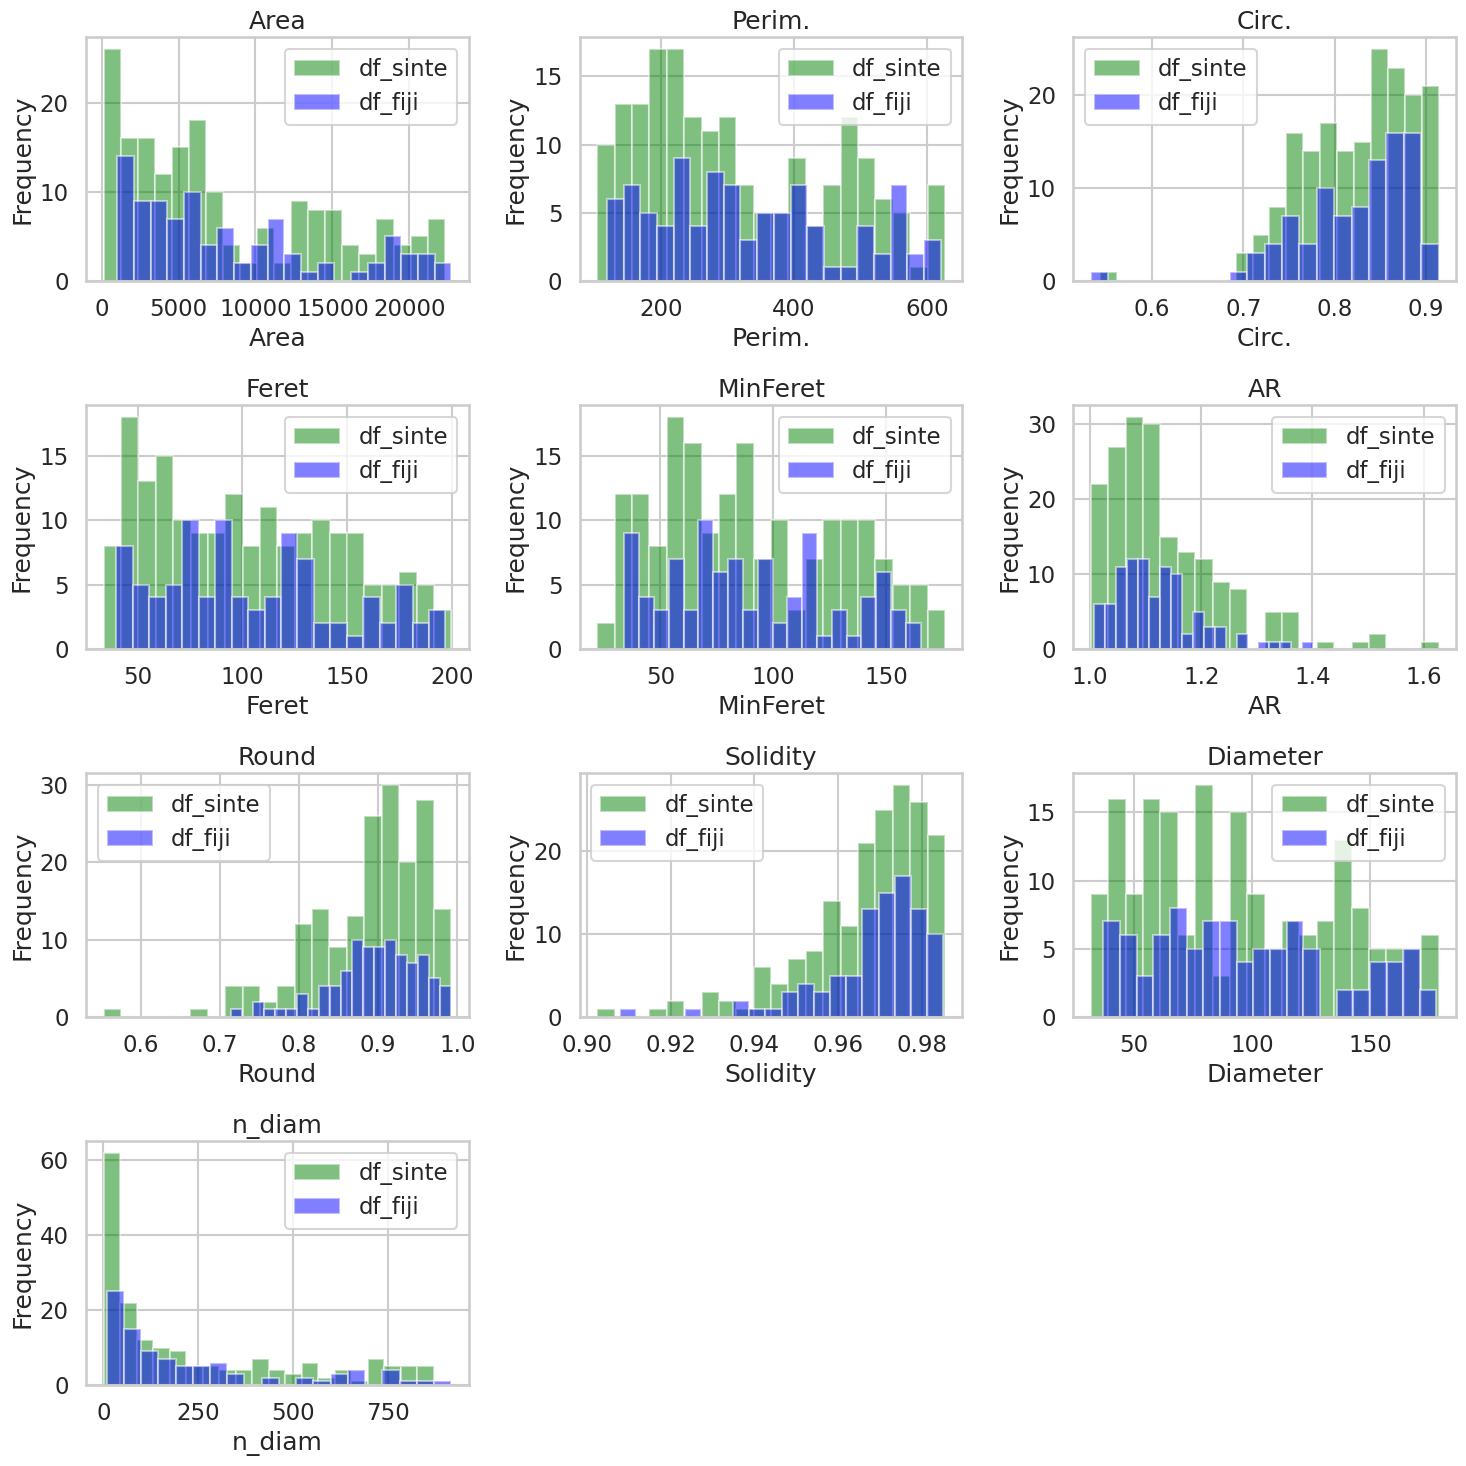

In [ ]:
#####################################
##Código para ver la distribución general de las cols de interés
##Datos originales Vs sintéticos...SOLO datos SI
#####################################

# Select the common columns
cols = ['Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round', 'Solidity', 'Diameter', 'n_diam']
# Filtrar solo datos sí para comparar con sinteticos_SI
df_fiji_si = df_fiji_3_4_5[df_fiji_3_4_5['Esferoide'] == 'si']

# Create subplots for each column
plt.figure(figsize=(15, 15))
num_cols = len(cols)

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    plt.hist(df_si_3_4_5[col], bins=20, color='green', alpha=0.5, label='df_sinte')
    plt.hist(df_fiji_si[col], bins=20, color='blue', alpha=0.5, label='df_fiji')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

En esta primera visualización se ve que la mayoría de los features presentean similar distribución entre los datos originales Vs sintéticos.

En el siguiente plot se visualiza la misma distribución pero discriminando por `dia`

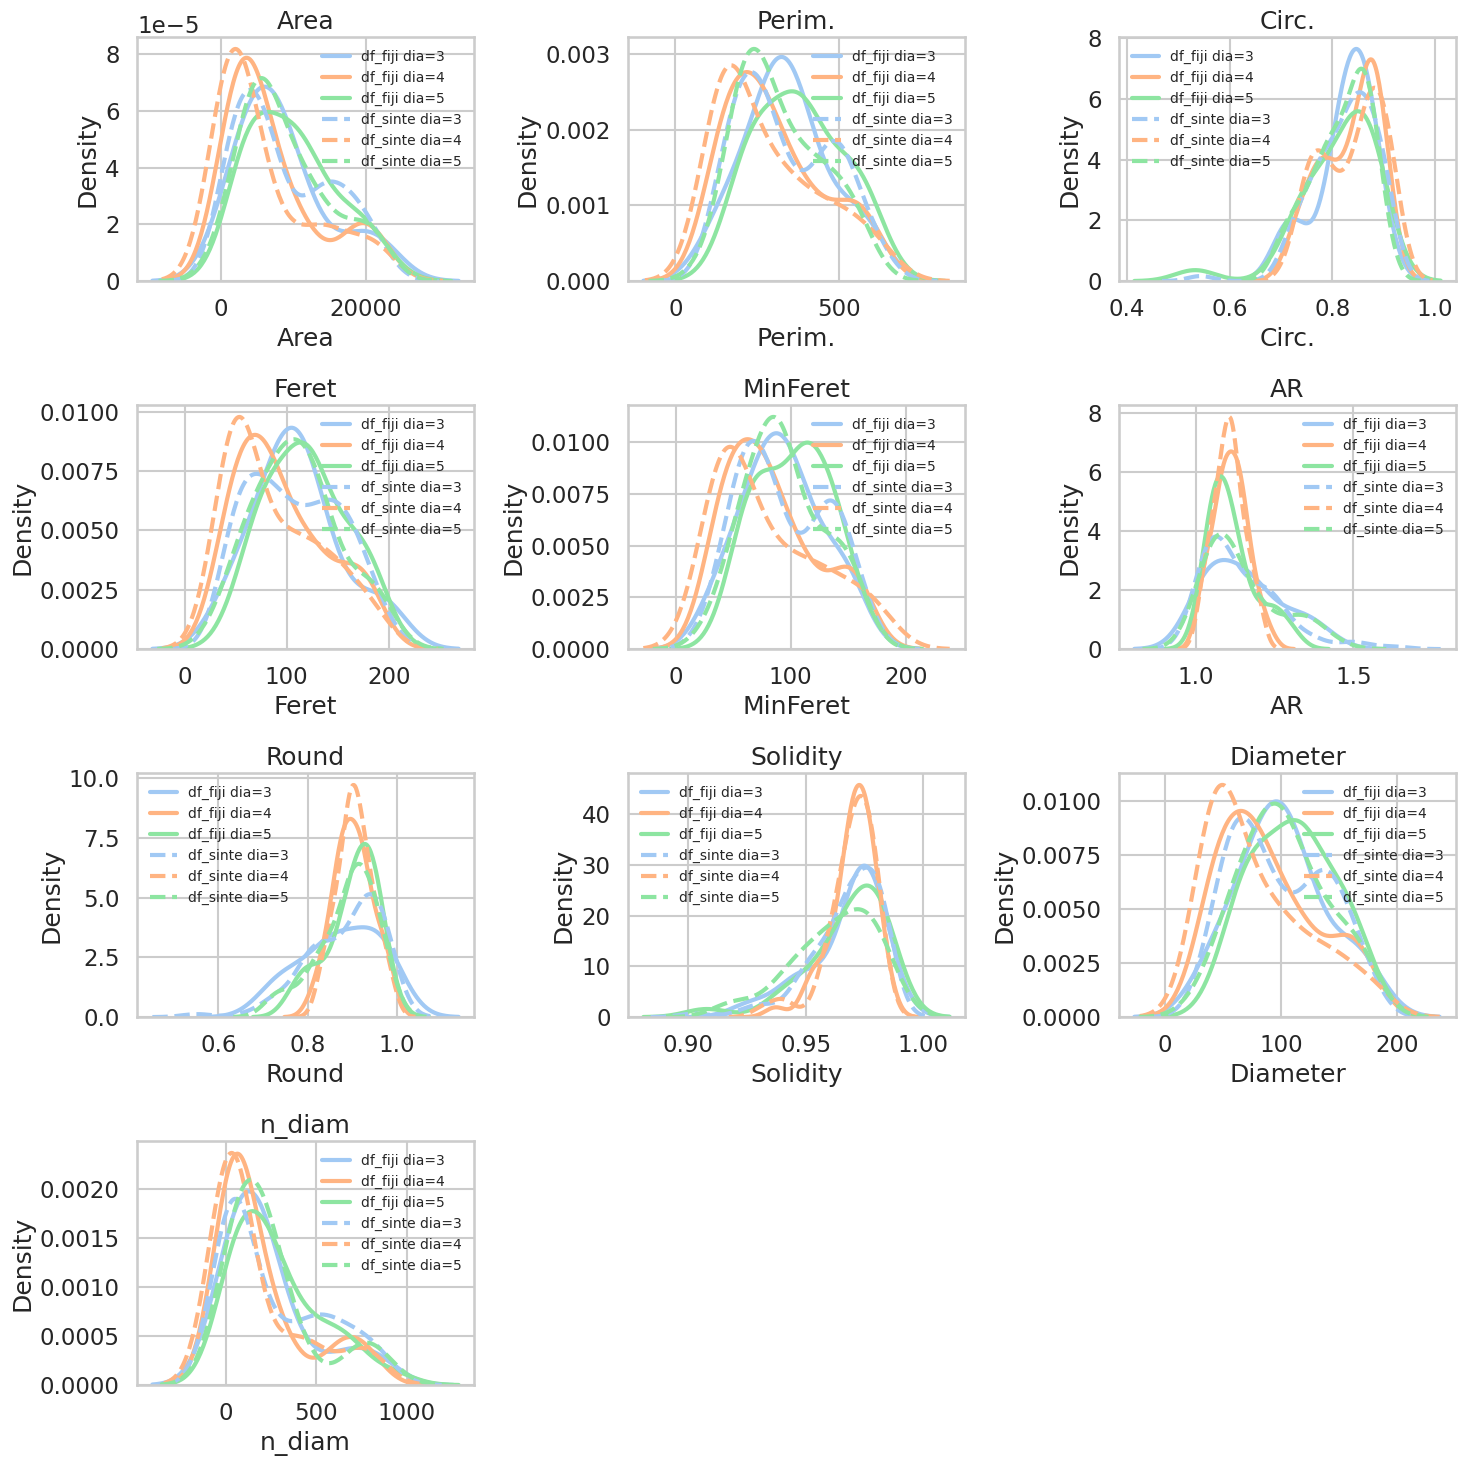

In [ ]:
#####################################
##Código para ver la distribución general de las cols de interés por día
## Datos originales Vs sintéticos SOLO datos SI
#####################################

# Select the common columns
cols = ['Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round', 'Solidity', 'Diameter', 'n_diam']

# Define the 'dia' values of interest
dia_values = [3, 4, 5]

# Filtrar solo datos sí para comparar con sinteticos_SI
df_fiji_si = df_fiji_3_4_5[df_fiji_3_4_5['Esferoide'] == 'si']

# Define a custom color palette with unique colors for each combination of dataframe and day
custom_palette = sns.color_palette("pastel", n_colors=len(dia_values) * 2)

# Create subplots for each column
plt.figure(figsize=(15, 15))
num_cols = len(cols)

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)

    # Plot KDE for df_fiji_3_4_5 with unique colors by day
    for j, dia_value in enumerate(dia_values):
        sns.kdeplot(df_fiji_si[df_fiji_si['dia'] == dia_value][col], label=f'df_fiji dia={dia_value}', linewidth=3, color=custom_palette[j])

    # Plot KDE for df_si_3_4_5 with unique colors by day
    for j, dia_value in enumerate(dia_values):
        sns.kdeplot(df_si_3_4_5[df_si_3_4_5['dia'] == dia_value][col], label=f'df_sinte dia={dia_value}', linestyle='--', linewidth=3, color=custom_palette[j])

    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()

La distribución de los datos sintéticos no es identica en todos los features a los originales de forma visual pero son visualmente baste similar, por lo tanto, podemos concatenar originales+sintéticos.

### df_selected

Se suman datos sintéticos + originales y se aclara que los datos originales no han sido limpiados, como se vió se filtró por dia pero no se eliminaron ouliers

In [ ]:
df_selected = pd.concat([df_fiji_3_4_5, df_si_3_4_5])
df_selected.shape

(531, 13)

## 4)Elegir uno de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):



Utilizaremos el dataset nombrado "df_selected"

Se suman datos sintéticos + originales y se aclara que los datos originales no han sido limpiados, como se vió se filtró por dia pero no se eliminaron ouliers



# 5)TRARTAMIENTO DE ESCENAIRO ELEGIDO

recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla. Separen en conjuntos de entrenamiento y test, hacer tratamiento de ouliers, agregar columnas preprocesadas al original como algunas que sean combinaciones/modificaciones de las demás, multiplicaciones, logaritmos, potencias, por ej, verificando que no sean correlacionadas con las que ya tienen.


Recordar que las transformaciones se realizan sobre el conjunto de train y luego se ajusta el de test. Si hacen todo antes y luego separan, puede haber traspaso de información sobre el conjunto de train al test (data leakage).

Realizar un EDA rápido de como quedaron las variables y si la distribuciones en test son similares a las que tienen en train. En todos los casos, tanto para train y test, visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

In [ ]:
##Recordar que el df_clean son datos dias 3-4-5 sumando los sintéticos y los originales no
##se eliminaron outliers
df_sel = df_selected.copy()
df_sel = df_sel.drop('dia', axis=1)
print(df_sel.columns)
df_sel.describe()

Index(['labels', 'Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round',
       'Solidity', 'Esferoide', 'Diameter', 'n_diam'],
      dtype='object')


,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Diameter,n_diam
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,5035.721986,232.958421,0.828920,75.411469,63.992029,1.178873,0.866492,0.957138,68.932164,138.597788
std,6001.416782,155.989878,0.085801,48.903782,42.375031,0.196806,0.107283,0.024631,44.758705,224.307127
min,122.762600,41.118800,0.500300,14.185200,12.152500,1.001200,0.420100,0.828900,13.297800,0.381040
25%,758.035900,106.111400,0.784338,34.806200,28.520350,1.059050,0.828664,0.950700,32.043405,5.089752
50%,1963.739800,184.968500,0.852498,59.535400,49.295700,1.118600,0.895100,0.963200,54.039400,18.593653
75%,7200.781736,327.969850,0.892850,110.378101,92.346850,1.213560,0.942450,0.972500,99.057371,169.740991
max,22735.999500,635.872400,0.944000,213.226500,175.936400,2.380700,0.998800,0.985500,179.769300,941.408471


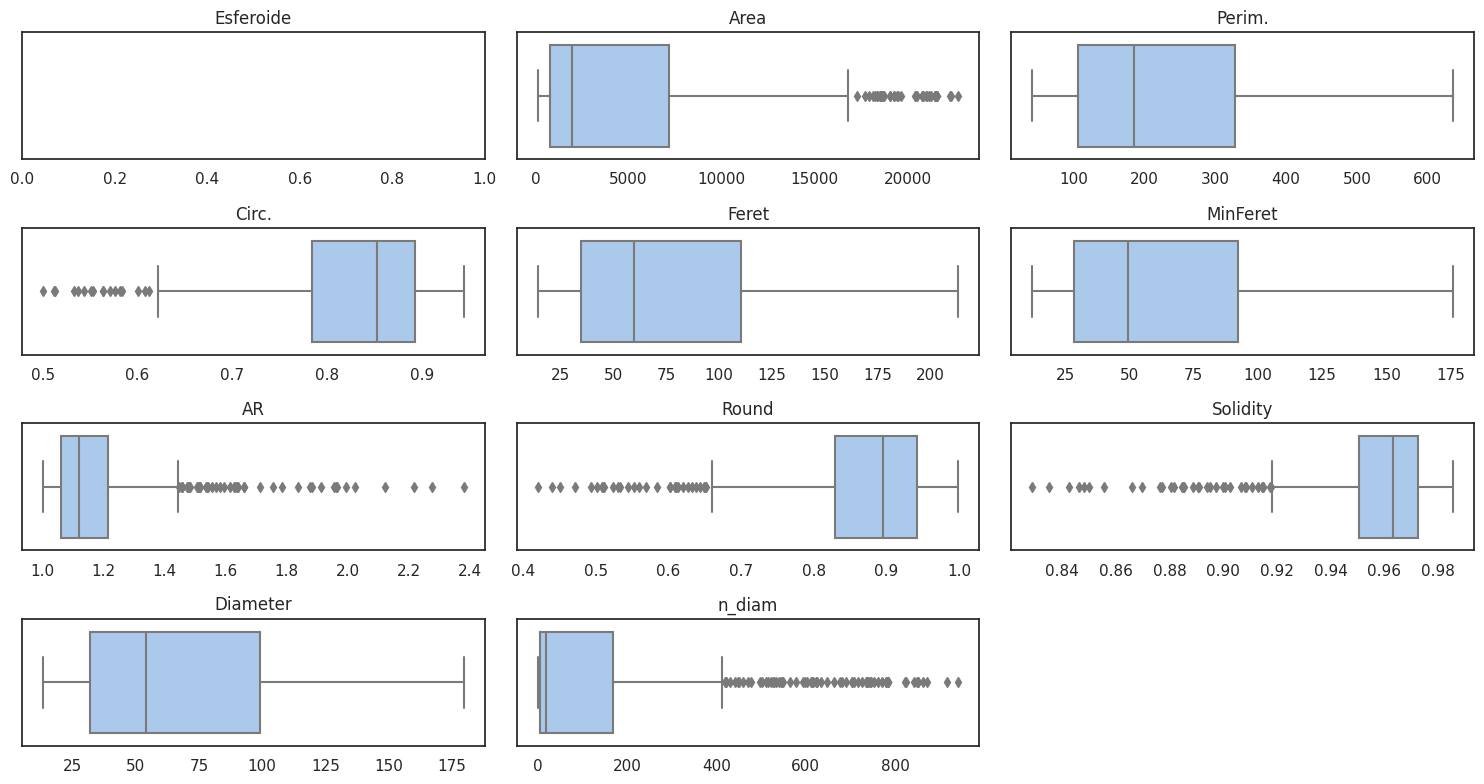

In [ ]:
sns.set_theme(style="white", palette="pastel")
# Assuming df contains your DataFrame with the listed variables
variables = ['Esferoide', 'Area', 'Perim.', 'Circ.', 'Feret', 'MinFeret', 'AR', 'Round',
       'Solidity', 'Diameter', 'n_diam']

# Create a long-format DataFrame
long_df = pd.melt(df_sel, id_vars=['Esferoide'], value_vars=variables, var_name='variable', value_name='value')

# Set up subplots using Seaborn
num_cols = 3  # Number of columns in the subplot grid
num_rows = len(variables) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=long_df[long_df['variable'] == variable], x='value', ax=axes[row, col])
    axes[row, col].set_title(variable)
    axes[row, col].set_xlabel('')

# Remove empty subplots
for i in range(len(variables), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

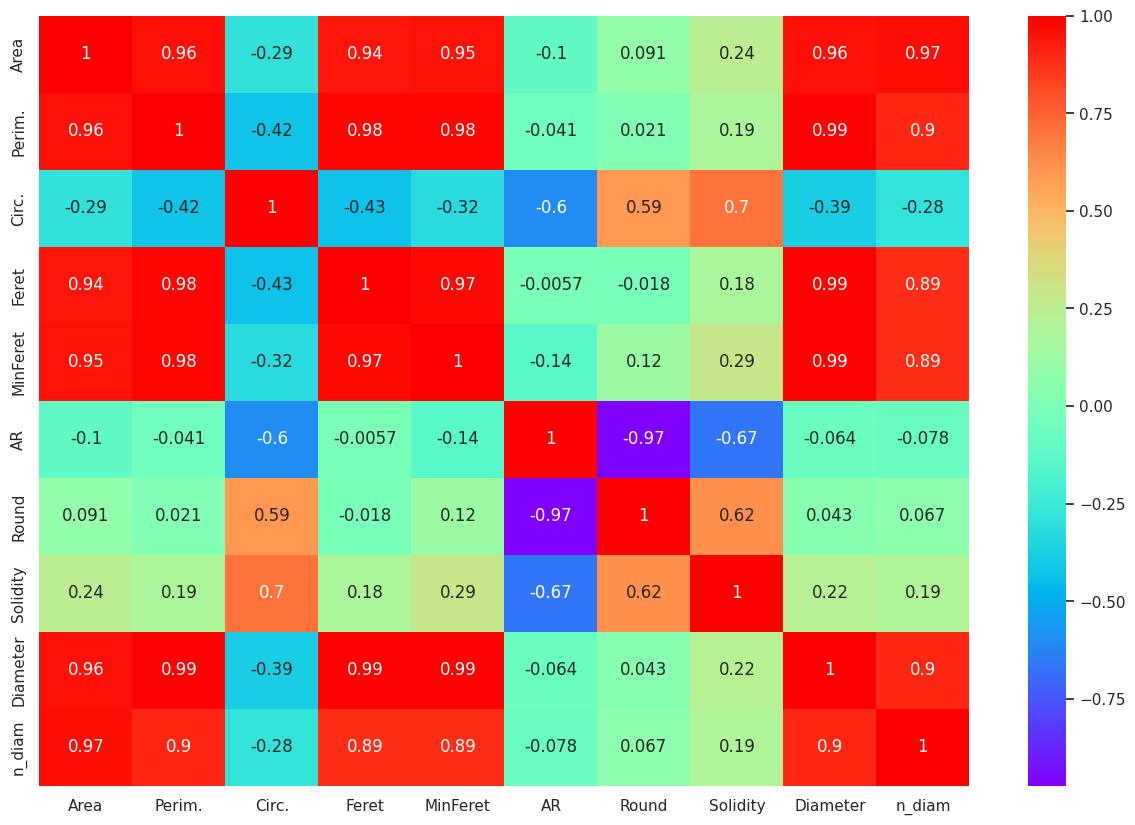

In [ ]:
##Resaltar aquellos con corr >0.9
def highlighter(cell_value):
  if cell_value > 0.9:
        return "background-color: green"
df_sel.corr().style.applymap(highlighter)

# Plot hitmap for better visualisation
plt.figure(figsize=(15,10))
sns.heatmap(df_sel.corr(),annot=True,cmap='rainbow')
plt.show()

In [ ]:
'''
Ver solo los features que tengan una corr > 0.9
'''
pd.set_option('display.max_rows',None)
corrmat = df_sel.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,MinFeret,Diameter,0.991773
1,Diameter,MinFeret,0.991773
2,Feret,Diameter,0.990441
3,Diameter,Feret,0.990441
4,Diameter,Perim.,0.988957
5,Perim.,Diameter,0.988957
6,Perim.,MinFeret,0.982149
7,MinFeret,Perim.,0.982149
8,Perim.,Feret,0.982068
9,Feret,Perim.,0.982068


Con base en lo observado se toma la decisión de sacar las columnas `MinFeret` y `Feret` que se correlacionan con varios de los otros features.

In [ ]:
cols = ['labels', 'Esferoide', 'Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Diameter', 'n_diam']
df_clean = df_sel[cols]
print(df_clean.columns)
print()
##Por las dudas revisar datos faltantes
columns_with_missing_values = df_clean.columns[df_clean.isnull().any()]
print("Columns with missing values: ", columns_with_missing_values)

##Tratar variable categórica
df_clean['Esferoide'] = df_clean['Esferoide'].map({'si': 1, 'no': 0})

Index(['labels', 'Esferoide', 'Area', 'Perim.', 'Circ.', 'AR', 'Round',
       'Solidity', 'Diameter', 'n_diam'],
      dtype='object')

Columns with missing values:  Index([], dtype='object')


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#6) CLASIFICADOR

Implementar sobre los conjuntos test y train del escenario elegido algún clasificador lineal como también probar DT, Random Forest y XGBoost.

Explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas (sobre todo f1 y precision) determinar cuál es el mejor algoritmo de clasificación. En los algoritmos que lo permitan, hacer listado de importancia de features y probar con diferentes combinaciones de columnas si la métrica hallada mejora si se disminuye la cantidad de columnas (puede ser que esto no ocurra también).

Con el algoritmo que tenga las mejores métricas , probar si mejora o empeoran la clasificación probando algún otro escenario (con todos los pasos que implica).

## Modelo baseline
Usaremos los parámetros por defecto (modelo baseline) para esta fase inicial

In [ ]:
# Crear una copia de la base de datos df_selected
df_fiji_base = df_selected.copy()
df_fiji_base.drop_duplicates(subset=['labels'], inplace=True)

# Crear una nueva variable Etiqueta
df_fiji_base['Etiqueta'] = df_fiji_base['Esferoide'].map({'si': 1, 'no': 0})

# Selección de variables
cols = ['Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Etiqueta','dia', 'Diameter', 'n_diam']
df_fiji_base = df_fiji_base[cols]
print(df_fiji_base.shape)

y = df_fiji_base.Etiqueta
X = df_fiji_base.drop('Etiqueta',axis=1)

(529, 10)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.58, random_state=3)

In [ ]:
#####################################
## Entrenar y evaluar los modelos.
## Este código entrenará y evaluará cada modelo con los parámetros por defecto y
## mostrará la matriz de confusión, métricas de precisión, exactitud y F1 Score para cada uno.
#####################################

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold


# Crear los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Entrenar y evaluar los modelos
results = {}

for model_name, model in models.items():
    print(f"------------MODELO:{model_name}------------")
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #presición
    precision = precision_score(y_test, y_pred)
    #F1
    f1 = f1_score(y_test, y_pred)
    #matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)
    #informe de clasificación
    m_cla = classification_report(y_test,y_pred)
    # Validación cruzada
    kfold = KFold(n_splits=5, shuffle=True, random_state=3)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"Informe de Clasificación:\n{m_cla}")
    print()
    print(f"Accuracy Score (Puntuación de Exactitud):{round(accuracy,2)}")
    print(f"Precision Score (Puntuación de Precisión):{round(precision,2)}")
    print(f"F1 Score:{round(f1,2)}")
    print(f"Validación cruzada:{scores}")
    print()
    print(f"Matriz de Confusión:{model_name}")
    print(confusion)
    print()
    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

# Crear un DataFrame con los resultados
import pandas as pd
results_df_4mod = pd.DataFrame(results)

# Mostrar los resultados
print("----------------------------------------------------------------------")
print(results_df_4mod)
print("----------------------------------------------------------------------")
print()

------------MODELO:Logistic Regression------------

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       106
           1       0.88      0.85      0.86       117

    accuracy                           0.86       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.86      0.86      0.86       223


Accuracy Score (Puntuación de Exactitud):0.86
Precision Score (Puntuación de Precisión):0.88
F1 Score:0.86
Validación cruzada:[0.81132075 0.89622642 0.85849057 0.83018868 0.78095238]

Matriz de Confusión:Logistic Regression
[[92 14]
 [18 99]]

------------MODELO:Decision Tree------------

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       106
           1       0.90      0.92      0.91       117

    accuracy                           0.91       223
   macro avg       0.91      0.90      0.91       223
weight

En relación a los **Accuracy**, solo Random Forest con el 93%y XGboost con 93%, presentan una presición superior al 90%,  lo que sugiere que son efectivos para predecir las etiquetas correctas en el conjunto de datos. Con respecto a **Precision**,XGBoost y Random Forest son los que presentan valores altos, superior al 90%. Y respecto al F1 Score, todos los modelos en general presentan valores de F1 Score altos, aunque solo XGBoost tiene el valor más alto con 93.5%, seguido por Random Forest con 93%. En general, los cuatro modelos (Logistic Regression, Decision Tree, Random Forest y XGBoost), pero solo Random Forest y XGBoost parecen tener los mejores rendimientos.

## Regresión Logistica

In [ ]:
# Crear una copia de la base de datos df_selected
df_fiji_rl = df_selected.copy()
df_fiji_rl.drop_duplicates(subset=['labels'], inplace=True)

# Crear una nueva variable Etiqueta
df_fiji_rl['Etiqueta'] = df_fiji_rl['Esferoide'].map({'si': 1, 'no': 0})

# Selección de variables
cols = ['Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Etiqueta','dia', 'Diameter', 'n_diam']
df_fiji_rl = df_fiji_rl[cols]
print(df_fiji_rl.shape)

y = df_fiji_rl.Etiqueta
X = df_fiji_rl.drop('Etiqueta',axis=1)

(529, 10)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.58, random_state = 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],  # Valores para el parámetro de regularización C
    'penalty': ['l1', 'l2'],  # Tipo de penalización
}

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=3)

# Realizar una búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear un modelo de regresión logística con los mejores hiperparámetros
best_logistic_model = LogisticRegression(**best_params, max_iter=1000, random_state=3)

# Ajustar el modelo a los datos de entrenamiento
best_logistic_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=3)

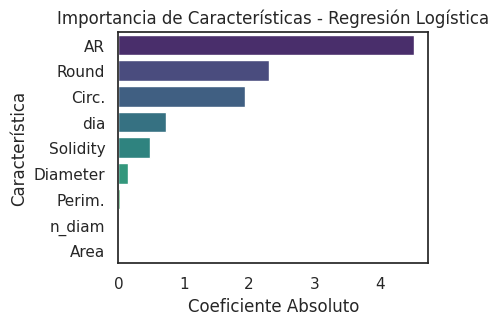

In [ ]:
# Obtener los coeficientes de importancia de las características
coeficientes = best_logistic_model.coef_[0]

# Crear un DataFrame con los nombres de las características y sus coeficientes
coeficientes_df = pd.DataFrame({'Característica': X.columns, 'Coeficiente': coeficientes})

# Ordenar el DataFrame por coeficiente absoluto
coeficientes_df['Coeficiente_Abs'] = np.abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Coeficiente_Abs', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(4, 3))
sns.barplot(x='Coeficiente_Abs', y='Característica', data=coeficientes_df, palette='viridis')
plt.xlabel('Coeficiente Absoluto')
plt.ylabel('Característica')
plt.title('Importancia de Características - Regresión Logística')
plt.show()

In [ ]:
y_pred = best_logistic_model.predict(x_test)
print("Informe de Clasificación:\n")
print(classification_report(y_test,best_logistic_model.predict(x_test)))
print()
accuracy_rl = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Puntuación de Exactitud): {round(accuracy_rl,2)}")
precision_rl = precision_score(y_test, y_pred)
print(f"Precision Score (Puntuación de Precisión): {round(precision_rl,2)}")
f1_rl = f1_score(y_test, y_pred)
print(f"F1 Score: {round(f1_rl,2)}")
print()
confusion_rl = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", confusion_rl)

Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       106
           1       0.89      0.85      0.87       117

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223


Accuracy Score (Puntuación de Exactitud): 0.87
Precision Score (Puntuación de Precisión): 0.89
F1 Score: 0.87

Matriz de Confusión: 
 [[ 94  12]
 [ 17 100]]


## Arbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

In [ ]:
# Crear una copia de la base de datos df_selected
df_fiji_DT = df_selected.copy()
df_fiji_DT.drop_duplicates(subset=['labels'], inplace=True)

# Crear una nueva variable Etiqueta
df_fiji_DT['Etiqueta'] = df_fiji_DT['Esferoide'].map({'si': 1, 'no': 0})

# Selección de variables
cols = ['Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Etiqueta','dia', 'Diameter', 'n_diam']
df_fiji_DT = df_fiji_DT[cols]
print(df_fiji_DT.shape)

y = df_fiji_DT.Etiqueta
X = df_fiji_DT.drop('Etiqueta',axis=1)

(529, 10)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.58, random_state = 3)

In [ ]:
# AJUSTE HIPERPARÁMETROS
# Define distribuciones de probabilidad para los hiperparámetros que deseas ajustar
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(1, 101, 5)),  # Profundidad máxima del árbol
    'min_samples_split': list(range(1, 21)),  # Mínimo de muestras para dividir un nodo interno
    'min_samples_leaf': list(range(1, 21))  # Mínimo de muestras requeridas en un nodo hoja
}

# Crea un modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()

# Realiza una búsqueda aleatoria con validación cruzada de 5 pliegues y 100 iteraciones
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=3,refit=True)
random_search.fit(x_train, y_train)

# Obtiene los mejores hiperparámetros encontrados por la búsqueda aleatoria
best_params = random_search.best_params_

# Crea un nuevo modelo con los mejores hiperparámetros
best_tree_model = DecisionTreeClassifier(**best_params)

# Entrena el modelo con los mejores hiperparámetros en el conjunto de entrenamiento completo
best_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=91, min_samples_leaf=2,
                       min_samples_split=18)

In [ ]:
best_params = random_search.best_params_
print("Mejores Hiperparámetros:", best_params)
print()
best_score = random_search.best_score_
print("Mejor Puntuación de Validación Cruzada:", best_score)
print()
importance_dt = best_tree_model.feature_importances_
print("Importancia de Características:", importance_dt)

Mejores Hiperparámetros: {'min_samples_split': 18, 'min_samples_leaf': 2, 'max_depth': 91, 'criterion': 'entropy'}

Mejor Puntuación de Validación Cruzada: 0.8988365943945004

Importancia de Características: [0.13352918 0.         0.03869069 0.         0.22308022 0.00833734
 0.05701603 0.48420568 0.05514087]


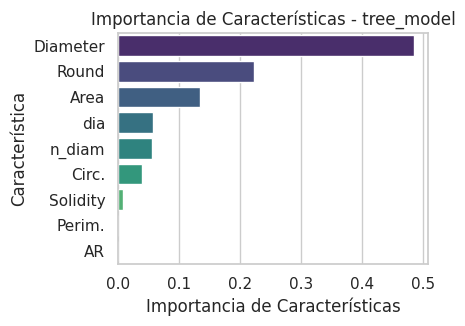

In [ ]:
nombres_de_caracteristicas= X.columns
# Crear un DataFrame con nombres de características y su importancia
importance_df = pd.DataFrame({'Característica': nombres_de_caracteristicas, 'Importancia': importance_dt})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
# Crear el gráfico de barras horizontal
sns.barplot(x="Importancia", y="Característica", data=importance_df, palette="viridis")
# Configurar el título y etiquetas
plt.xlabel('Importancia de Características')
plt.ylabel('Característica')
plt.title('Importancia de Características - tree_model')
# Mostrar el gráfico
plt.show()

In [ ]:
y_pred = best_tree_model.predict(x_test)
print("Informe de Clasificación:\n")
print(classification_report(y_test,best_tree_model.predict(x_test)))
print()
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Puntuación de Exactitud): {round(accuracy_dt,2)}")
precision_dt = precision_score(y_test, y_pred)
print(f"Precision Score (Puntuación de Precisión): {round(precision_dt,2)}")
f1_dt = f1_score(y_test, y_pred)
print(f"F1 Score: {round(f1_dt,2)}")
print()
confusion_dt = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", confusion_dt)

Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       106
           1       0.92      0.87      0.89       117

    accuracy                           0.89       223
   macro avg       0.89      0.89      0.89       223
weighted avg       0.89      0.89      0.89       223


Accuracy Score (Puntuación de Exactitud): 0.89
Precision Score (Puntuación de Precisión): 0.92
F1 Score: 0.89

Matriz de Confusión: 
 [[ 97   9]
 [ 15 102]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pandas.plotting import autocorrelation_plot
import numpy as np

In [ ]:
# Crear una copia de la base de datos df_selected
df_fiji_RF = df_selected.copy()
df_fiji_RF.drop_duplicates(subset=['labels'], inplace=True)

# Crear una nueva variable Etiqueta
df_fiji_RF['Etiqueta'] = df_fiji_RF['Esferoide'].map({'si': 1, 'no': 0})

# Selección de variables
cols = ['Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Etiqueta','dia', 'Diameter', 'n_diam']
df_fiji_RF = df_fiji_RF[cols]
print(df_fiji_RF.shape)

y = df_fiji_RF.Etiqueta
X = df_fiji_RF.drop('Etiqueta',axis=1)

(529, 10)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.58, random_state = 3)

In [ ]:
# AJUSTE HIPERPARÁMETROS
# Crear un modelo Random Forest
rf_model = RandomForestClassifier(random_state=3)

# Definir el espacio de hiperparámetros a explorar
param_dist = {
    'n_estimators': [100,300,500,600,700,800],
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': list(range(1, 41)),
    'min_samples_leaf': list(range(1, 41)),
}

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=12, cv=5, scoring='accuracy', random_state=3,refit=True)

# Ajustar la búsqueda aleatoria con un test_size = 0.5
random_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Crear un modelo Random Forest con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**best_params, random_state=3)

# Entrenar el modelo con los mejores hiperparámetros en tus datos
best_rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=500,
                       random_state=3)

In [ ]:
best_params = random_search.best_params_
print("Mejores Hiperparámetros:", best_params)
print()
best_score = random_search.best_score_
print("Mejor Puntuación de Validación Cruzada:", best_score)
print()
importance_rf = best_rf_model.feature_importances_
print("Importancia de Características: ", importance_rf)

Mejores Hiperparámetros: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50}

Mejor Puntuación de Validación Cruzada: 0.9020095187731358

Importancia de Características:  [0.18102411 0.15973718 0.06892681 0.05498495 0.07367076 0.09143674
 0.01725932 0.23043516 0.12252496]


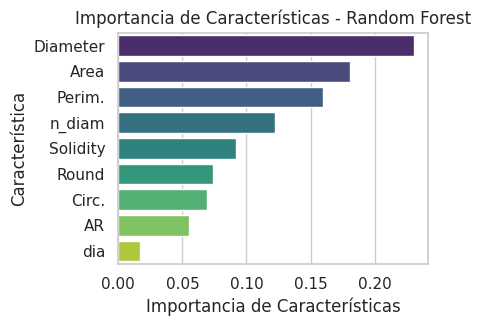

In [ ]:
nombres_de_caracteristicas=X.columns
# Crear un DataFrame con nombres de características y su importancia
importance_df = pd.DataFrame({'Característica': nombres_de_caracteristicas, 'Importancia': importance_rf})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
# Crear el gráfico de barras horizontal
sns.barplot(x="Importancia", y="Característica", data=importance_df, palette="viridis")
# Configurar el título y etiquetas
plt.xlabel('Importancia de Características')
plt.ylabel('Característica')
plt.title('Importancia de Características - Random Forest')
# Mostrar el gráfico
plt.show()

In [ ]:
y_pred = best_rf_model.predict(x_test)
print("Informe de Clasificación:\n")
print(classification_report(y_test,best_rf_model.predict(x_test)))
print()
y_pred = best_rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Puntuación de Exactitud): {round(accuracy_rf,2)}")
precision_rf = precision_score(y_test, y_pred)
print(f"Precision Score (Puntuación de Precisión): {round(precision_rf,2)}")
f1_rf = f1_score(y_test, y_pred)
print(f"F1 Score: {round(f1_rf,2)}")
print()
confusion_rf = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", confusion_rf)

Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.92      0.92      0.92       117

    accuracy                           0.92       223
   macro avg       0.92      0.92      0.92       223
weighted avg       0.92      0.92      0.92       223


Accuracy Score (Puntuación de Exactitud): 0.92
Precision Score (Puntuación de Precisión): 0.92
F1 Score: 0.92

Matriz de Confusión: 
 [[ 97   9]
 [  9 108]]


## Xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Crear una copia de la base de datos df_selected
df_fiji_XG = df_selected.copy()
df_fiji_XG.drop_duplicates(subset=['labels'], inplace=True)

# Crear una nueva variable Etiqueta
df_fiji_XG['Etiqueta'] = df_fiji_XG['Esferoide'].map({'si': 1, 'no': 0})

# Selección de variables
cols = ['Area', 'Perim.', 'Circ.', 'AR', 'Round', 'Solidity', 'Etiqueta','dia', 'Diameter', 'n_diam']
df_fiji_XG = df_fiji_XG[cols]
print(df_fiji_XG.shape)

y = df_fiji_XG.Etiqueta
X = df_fiji_XG.drop('Etiqueta',axis=1)

(529, 10)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.58, random_state = 3)

Aplicando RandomizedSearchCV

In [ ]:
# Define una distribución de hiperparámetros para buscar
param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Crea un modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realiza la búsqueda aleatoria
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', refit=True, random_state=42)

# Ajusta el modelo a tus datos
random_search.fit(x_train, y_train)

# Obtiene los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crea un nuevo modelo XGBoost con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators']
)

# Entrena el nuevo modelo en tus datos
best_xgb_model.fit(x_train, y_train)

Mejores hiperparámetros: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
importance_xgb_r = best_xgb_model.feature_importances_
print("Importancia de Características: ", importance_xgb_r)

Importancia de Características:  [0.08179419 0.05583483 0.07192705 0.0246068  0.07248181 0.04253019
 0.03560126 0.5638689  0.05135497]


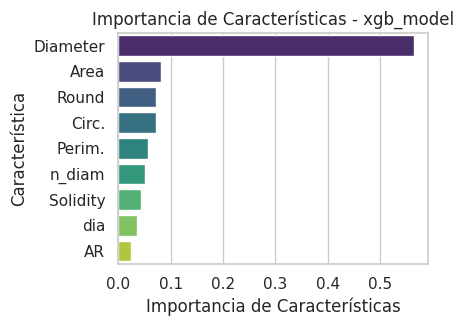

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
nombres_de_caracteristicas= X.columns
# Crear un DataFrame con nombres de características y su importancia
importance_df = pd.DataFrame({'Característica': nombres_de_caracteristicas, 'Importancia': importance_xgb_r})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
# Crear el gráfico de barras horizontal
sns.barplot(x="Importancia", y="Característica", data=importance_df, palette="viridis")
# Configurar el título y etiquetas
plt.xlabel('Importancia de Características')
plt.ylabel('Característica')
plt.title('Importancia de Características - xgb_model')
# Mostrar el gráfico
plt.show()

In [ ]:
y_pred = best_xgb_model.predict(x_test)
print("Informe de Clasificación:\n")
print(classification_report(y_test,best_xgb_model.predict(x_test)))
print()
y_pred = best_xgb_model.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred)
print(f"Accuracy Score (Puntuación de Exactitud): {round(accuracy_xg,2)}")
precision_xg = precision_score(y_test, y_pred)
print(f"Precision Score (Puntuación de Precisión): {round(precision_xg,2)}")
f1_xg = f1_score(y_test, y_pred)
print(f"F1 Score: {round(f1_xg,2)}")
print()
confusion_xg = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", confusion_xg)

Informe de Clasificación:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       106
           1       0.94      0.92      0.93       117

    accuracy                           0.93       223
   macro avg       0.93      0.93      0.93       223
weighted avg       0.93      0.93      0.93       223


Accuracy Score (Puntuación de Exactitud): 0.93
Precision Score (Puntuación de Precisión): 0.94
F1 Score: 0.93

Matriz de Confusión: 
 [[ 99   7]
 [  9 108]]


In [ ]:
data_f = {
    'Modelo': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_rl, accuracy_dt, accuracy_rf, accuracy_xg],
    'Precision': [precision_rl, precision_dt, precision_rf, precision_xg],
    'F1 Score': [f1_rl, f1_dt, f1_rf, f1_xg]
}
df_f = pd.DataFrame(data_f)
df_f.set_index('Modelo', inplace=True)
print("Modelos Ajustados: \n--------------------------------------------------")
print(df_f)
print("--------------------------------------------------")

Modelos Ajustados: 
--------------------------------------------------
                     Accuracy  Precision  F1 Score
Modelo                                            
Logistic Regression  0.869955   0.892857  0.873362
Decision Tree        0.892377   0.918919  0.894737
Random Forest        0.919283   0.923077  0.923077
XGBoost              0.928251   0.939130  0.931034
--------------------------------------------------


En relación a los **Accuracy**, solo Random Forest y XGboost presentan una presición superior al 90%, por lo que serían efectivos para predecir correctamente el conjunto de datos. Con respecto a **Precision**,XGBoost tiene la precisión más alta, seguido de cerca por Random Forest. Y respecto al **F1 Score**, todos los modelos tienen valores de F1 Score, XGBoost tiene el valor más alto, seguido por Random Forest, lo que indica un buen equilibrio entre precisión y recall. En general, los cuatro modelos (Logistic Regression, Decision Tree, Random Forest y XGBoost), pero solo Random Forest y XGBoost parecen tener los mejores rendimientos.

En relación a las caracteristicas más importantes para cada modelo, podemos observar que hubo una caracteristica en común en tres modelos, Decision Tree, Random Forest y XGBoost, que fue el "Diametro", y en segundo y tercer lugar "Round" y "Area", variando para cada modelo. Lo que nos daría un indicio de lo relevante que pueden llegar a ser estas variables para trabajar la predicción correctamente en nuestro conjunto de datos, como así tambien en el ajuste de los modelos.


#OPCIONAL:

Probar la métrica: coeficiente de correlación de Matthews (está implementado en sklearn como una métrica más: from sklearn.metrics import matthews_corrcoef )

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los escenarios anteriores.

Super buenas prácticas en este repositorio, es muy instructivo chusmear sobre todo el archivo '06_FinalModel.ipynb' solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.

Como este es el último práctico, si se animan, podrían implementar clústering. Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP.

Realizar EDA sobre los conjuntos que encontraron y traten de explicarlos.

Muchas veces en problemas de negocios, no es tan importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".